<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

**Выполнил:** Денис Абрашин ([профиль Kaggle](https://www.kaggle.com/denisabrashin))

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на [Cтепик](https://stepik.org/lesson/501479/step/2?unit=493164) будут проверять несколько других студентов и агрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пишите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсутствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

## Подключение и настройка необходимых библиотек

### Настройка numpy и pandas

In [2]:
# обновление библиотек Numpy и Pandas для исключения ошибок версий на некоторых платформах
# !pip3 install --upgrade --user --quiet --no-warn-script-location numpy==1.19.3 pandas

In [3]:
import numpy as np
import pandas as pd

In [4]:
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)
pd.set_option('display.float_format', '{:.3f}'.format)

### Настройка библиотек визуализации

In [5]:
from IPython.display import HTML, display

In [6]:
# обновление библиотек
# !pip3 install --upgrade --user --quiet matplotlib seaborn

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
small, medium, large = 14, 16, 22
params = {'figure.figsize':   (16, 6),
          'figure.titlesize': medium,
          'legend.fontsize':  medium,
          'axes.titlesize':   medium,
          'axes.labelsize':   medium,
          'xtick.labelsize':  medium,
          'ytick.labelsize':  medium,
          'legend.loc':       'best'}
plt.rcParams.update(params)

In [10]:
# повышение четкости  графиков для больших мониторов
%config InlineBackend.figure_format = 'retina'               

In [11]:
# включение цветового оформления
sns.set_style('white')

In [12]:
# !conda install -c meffmadd pandas-visual-analysis

In [13]:
from pandas_visual_analysis import VisualAnalysis

### Подключение библиотек машинного обучения

In [14]:
# обновление библиотек
# !pip3 install --upgrade --user --quiet sklearn

In [15]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [16]:
# !pip install --upgrade --user --quiet catboost

In [17]:
from catboost import CatBoostClassifier

## Загрузка данных (2 балла)

1) [Посмотрите](#Примеры-из-обучающего-набора-данных) на случайные строчки. 

2) [Посмотрите](#Обработка-пропусков), есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [18]:
data = pd.read_csv('./train.csv')

In [19]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Примеры из обучающего набора данных

In [20]:
data.sample(10)

ClientPeriod  MonthlySpending TotalSpent     Sex  ...  HasContractPhone  \
1022            67           60.500       3870  Female  ...          One year   
1707             0           73.350             Female  ...          Two year   
4623            37          104.500       3778    Male  ...          One year   
3412             3           20.050      75.45    Male  ...    Month-to-month   
4450            19           88.800    1672.35    Male  ...    Month-to-month   
499             42           85.900    3729.75  Female  ...    Month-to-month   
2740            69          108.750    7493.05  Female  ...          One year   
4202             7           93.850      635.6    Male  ...    Month-to-month   
4951            24           94.100    2322.85    Male  ...    Month-to-month   
190             63           99.700     6330.4    Male  ...          Two year   

     IsBillingPaperless              PaymentMethod Churn  
1022                 No    Credit card (automatic)     0  
1707                 No               Mailed check     0  
4623                Yes    Credit card (automatic)     0  
3412                Yes               Mailed check     0  
4450                Yes    Credit card (automatic)     0  
499                 Yes    Credit card (automatic)     0  
2740                Yes  Bank transfer (automatic)     0  
4202                Yes           Electronic check     1  
4951                Yes           Electronic check     0  
190                  No    Credit card (automatic)     0  

[10 rows x 20 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Большинство категориальных признаков имеют строковый тип. Это не подходит для эффективного решения задачи. Целесообразно в дальнейшем привести их к числовому типу, например, с помощью [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) или [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

### Обработка пропусков

Выведем количество пропусков в каждом признаке:

In [22]:
display(data.isna().sum())

ClientPeriod            0
MonthlySpending         0
TotalSpent              0
Sex                     0
IsSeniorCitizen         0
                       ..
HasMovieSubscription    0
HasContractPhone        0
IsBillingPaperless      0
PaymentMethod           0
Churn                   0
Length: 20, dtype: int64

In [23]:
print(f'Общее количество пропусков (nan) в обучающем наборе данных: {data.isna().sum().sum()}')

Общее количество пропусков (nan) в обучающем наборе данных: 0


Признак `TotalSpent` имеет строковый тип, но при этом содержит числовые значения. Это может свидетельствовать о наличии в данном поле пустых строковых выражений. Попробуем найти их:

In [24]:
print('Пустые строковые выражения содержатся в полях:',
      ', '.join([column for column in data.select_dtypes(include='object') if '' in data[column].str.strip().unique()]))

Пустые строковые выражения содержатся в полях: TotalSpent


Посмотрим на записи с пустыми строковыми значениями:

In [25]:
data[data.TotalSpent.str.strip() == '']

ClientPeriod  MonthlySpending TotalSpent     Sex  ...  HasContractPhone  \
1048             0           25.750               Male  ...          Two year   
1707             0           73.350             Female  ...          Two year   
2543             0           19.700               Male  ...          One year   
3078             0           80.850             Female  ...          Two year   
3697             0           20.000             Female  ...          Two year   
4002             0           61.900               Male  ...          Two year   
4326             0           25.350               Male  ...          Two year   
4551             0           52.550             Female  ...          Two year   
4598             0           56.050             Female  ...          Two year   

     IsBillingPaperless              PaymentMethod Churn  
1048                 No               Mailed check     0  
1707                 No               Mailed check     0  
2543                Yes               Mailed check     0  
3078                 No               Mailed check     0  
3697                 No               Mailed check     0  
4002                Yes  Bank transfer (automatic)     0  
4326                 No               Mailed check     0  
4551                Yes  Bank transfer (automatic)     0  
4598                 No    Credit card (automatic)     0  

[9 rows x 20 columns]

Оказалось, что у новых клиентов, у которых срок получения услуг меньше месяца (признак `ClientPeriod` равен 0), признак `TotalSpent` не содержит значений, поэтому тип поля остался строковым. Как представляется, пропущенные значения `TotalSpent` целесообразно заполнить признаком `MonthlySpending` - суммой уже израсходованных средств за неполный месяц.

In [26]:
def FixTotalSpent(data):
    if data['TotalSpent'].dtype == object:
        data.loc[data.TotalSpent.str.strip() == '', 'TotalSpent'] = data.loc[data.TotalSpent.str.strip() == '', 'MonthlySpending']
        data.TotalSpent = data.TotalSpent.astype(float)

In [27]:
FixTotalSpent(data)

## Анализ данных (3 балла)

1) Для численных признаков [постройте](#Анализ-численных-признаков) гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных [посчитайте](#Анализ-категориальных-признаков) количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном графике с помощью *plt.subplots(...)*). 

2) [Посмотрите](#Распределение-целевой-переменной) на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) [Поиграйте](#Использование-дополнительных-библиотек-визуализации) с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### Анализ численных признаков

Опишем функцию, которая выведет информацию, необходимую для анализа численных переменных:

In [28]:
def show_numeric_info(data, columns):
    for column in columns:
        display(HTML(f'<h4>Численный признак "{column}"</h4>'))

        fig = plt.figure()
        ax1, ax2 = fig.subplots(1, 2)
        
        sns.histplot(data=data, x=column, hue=target_col, ax=ax1)
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.yaxis.grid()
        
        sns.boxplot(data=data, y=column, x=target_col, ax=ax2)
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.yaxis.grid()

        plt.show()

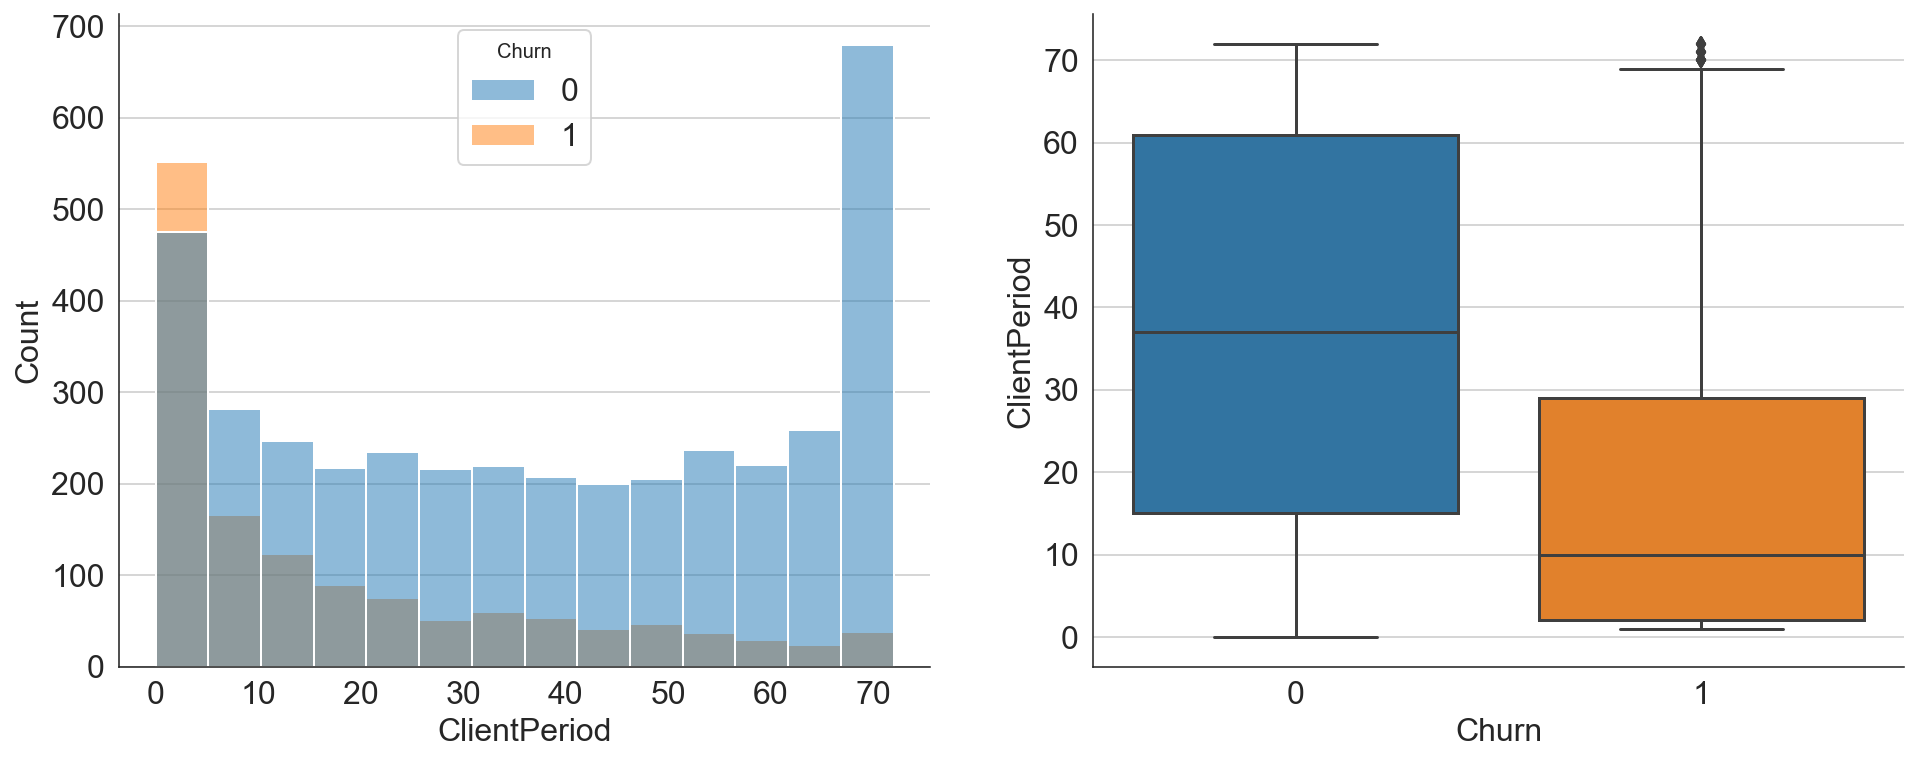

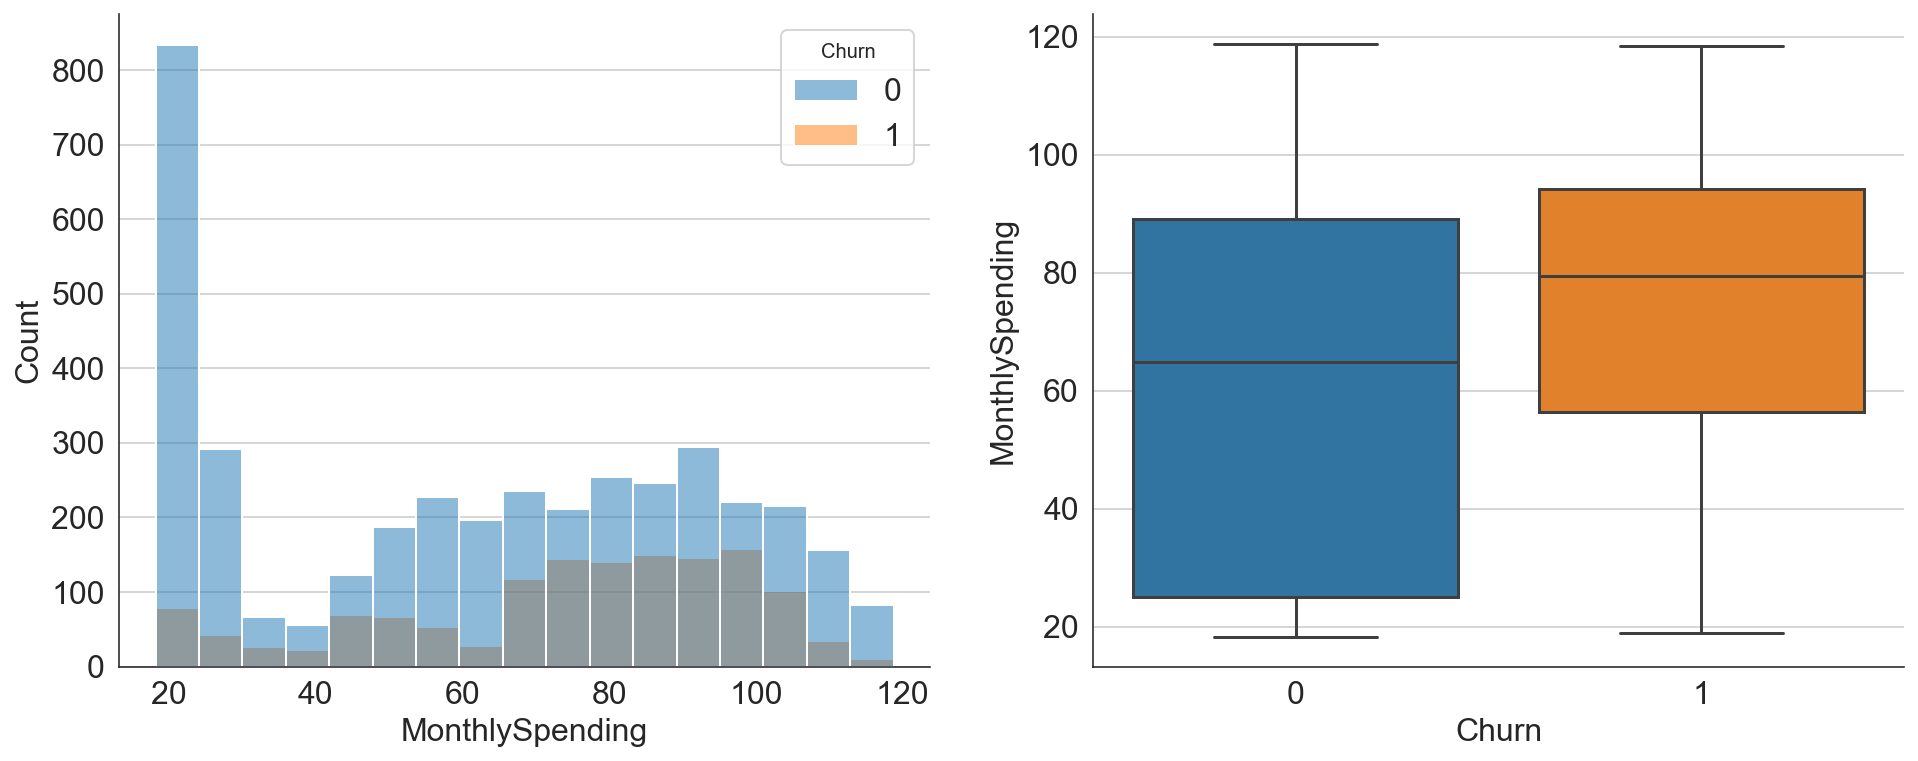

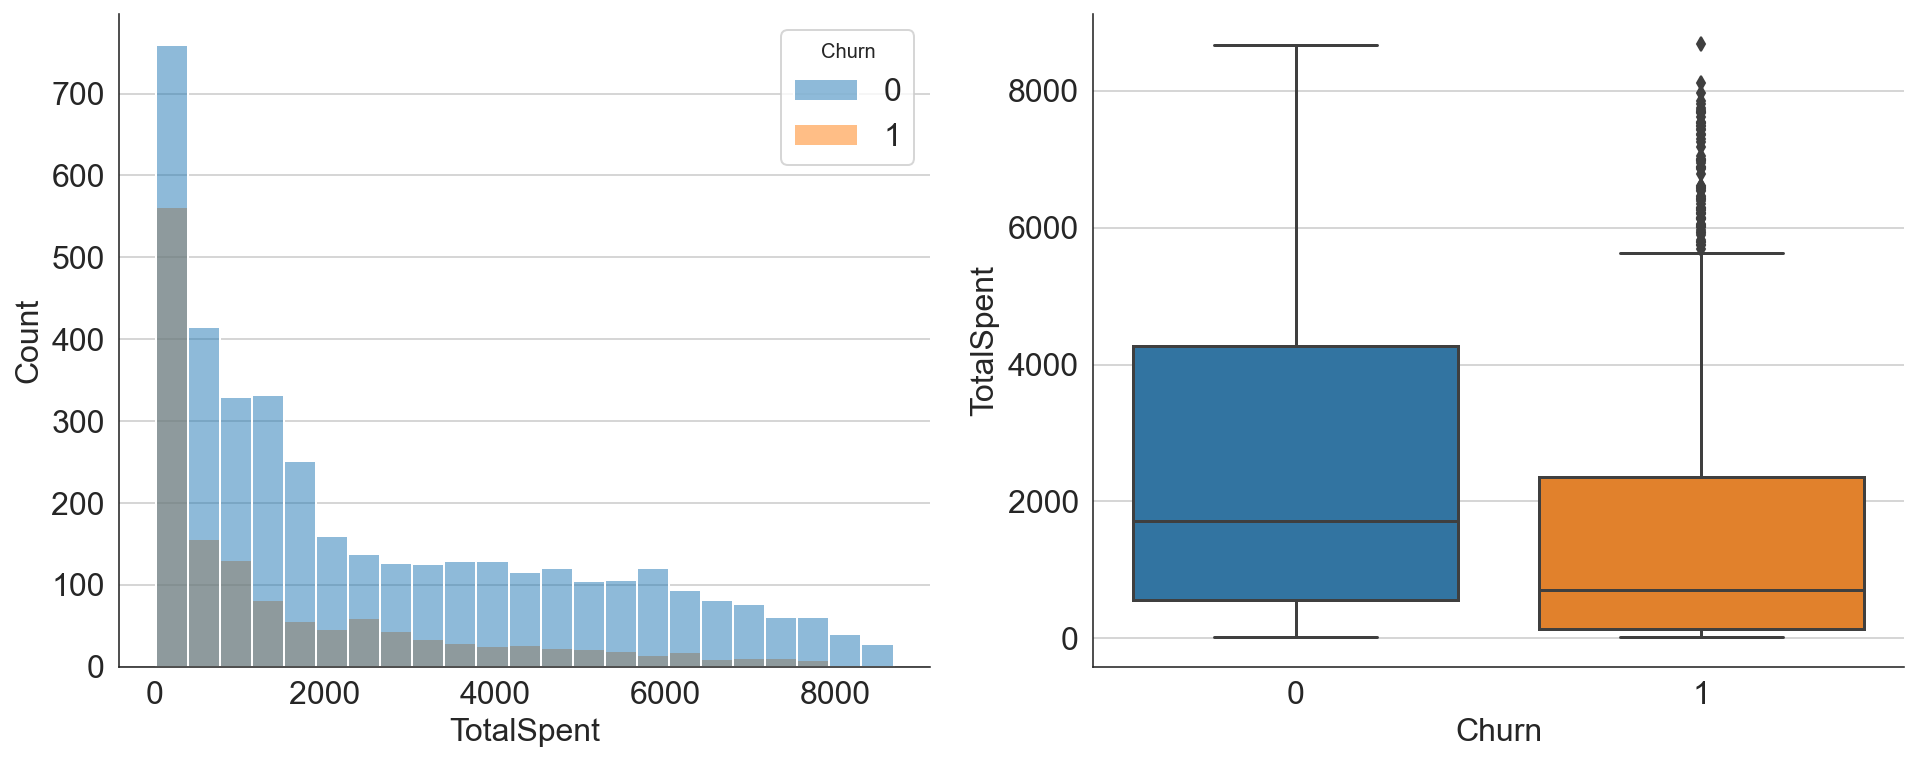

In [29]:
show_numeric_info(data, num_cols)

### Анализ категориальных признаков

Опишем функцию, которая выведет информацию, необходимую для анализа категориальных переменных:

In [30]:
def show_category_info(data, columns):
    size = 0.3
    cmap = plt.get_cmap('tab20c')
    outer_colors = cmap(np.arange(4)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14]))
    count_name = 'Количество'

    for column in columns:
        display(HTML(f'<h4>Категориальный признак "{column}"</h4>'))
        
        df = data[[column, target_col]].value_counts(sort=False).reset_index()
        df.columns.values[2] = count_name
                
        display(pd.pivot_table(data=df, index=column, columns=[target_col], values=[count_name], aggfunc='sum',
                margins=True, margins_name='Всего', dropna=False))

        fig = plt.figure()
        ax1, ax2 = fig.subplots(1, 2)
        
        ax1.set(title=f'Гистограмма "{column}" и "{target_col}"')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)

        values = pd.pivot_table(data=df, index=column, columns=[target_col], values=[count_name], aggfunc='sum', dropna=False)
        values.columns = [f'{target_col} = {f2}' for f1, f2 in values.columns]
        values.plot.bar(ax=ax1, stacked=True,
                        rot=0 if values.shape[0] <= 3 else 8)
        ax1.yaxis.grid()
        
        ax2.pie(df.groupby(column, sort=False)[count_name].sum(),
                radius=1, colors=outer_colors,
                labels=df[column].drop_duplicates(), textprops={'fontsize': medium},
                autopct='%1.1f%%', pctdistance=0.85,
                wedgeprops=dict(width=size, edgecolor='w'))

        ax2.pie(df[count_name],
                radius=1-size, colors=inner_colors,
                labels=df[target_col], labeldistance=0.45, textprops={'fontsize': medium},
                autopct='%1.1f%%', pctdistance=0.8,
                wedgeprops=dict(width=size, edgecolor='w'))

        ax2.set(aspect='equal', title=f'Круговая диаграмма "{column}" и "{target_col}"')
        
        plt.tight_layout()
        plt.show()

Проанализируем категориальные признаки, принимая во внимания, что внутри круговых диаграмм изображены значения целевой переменной (0 и 1) для различных вариантов признака:

Количество            
Churn           0     1 Всего
Sex                          
Female       1929   698  2627
Male         1969   686  2655
Всего        3898  1384  5282

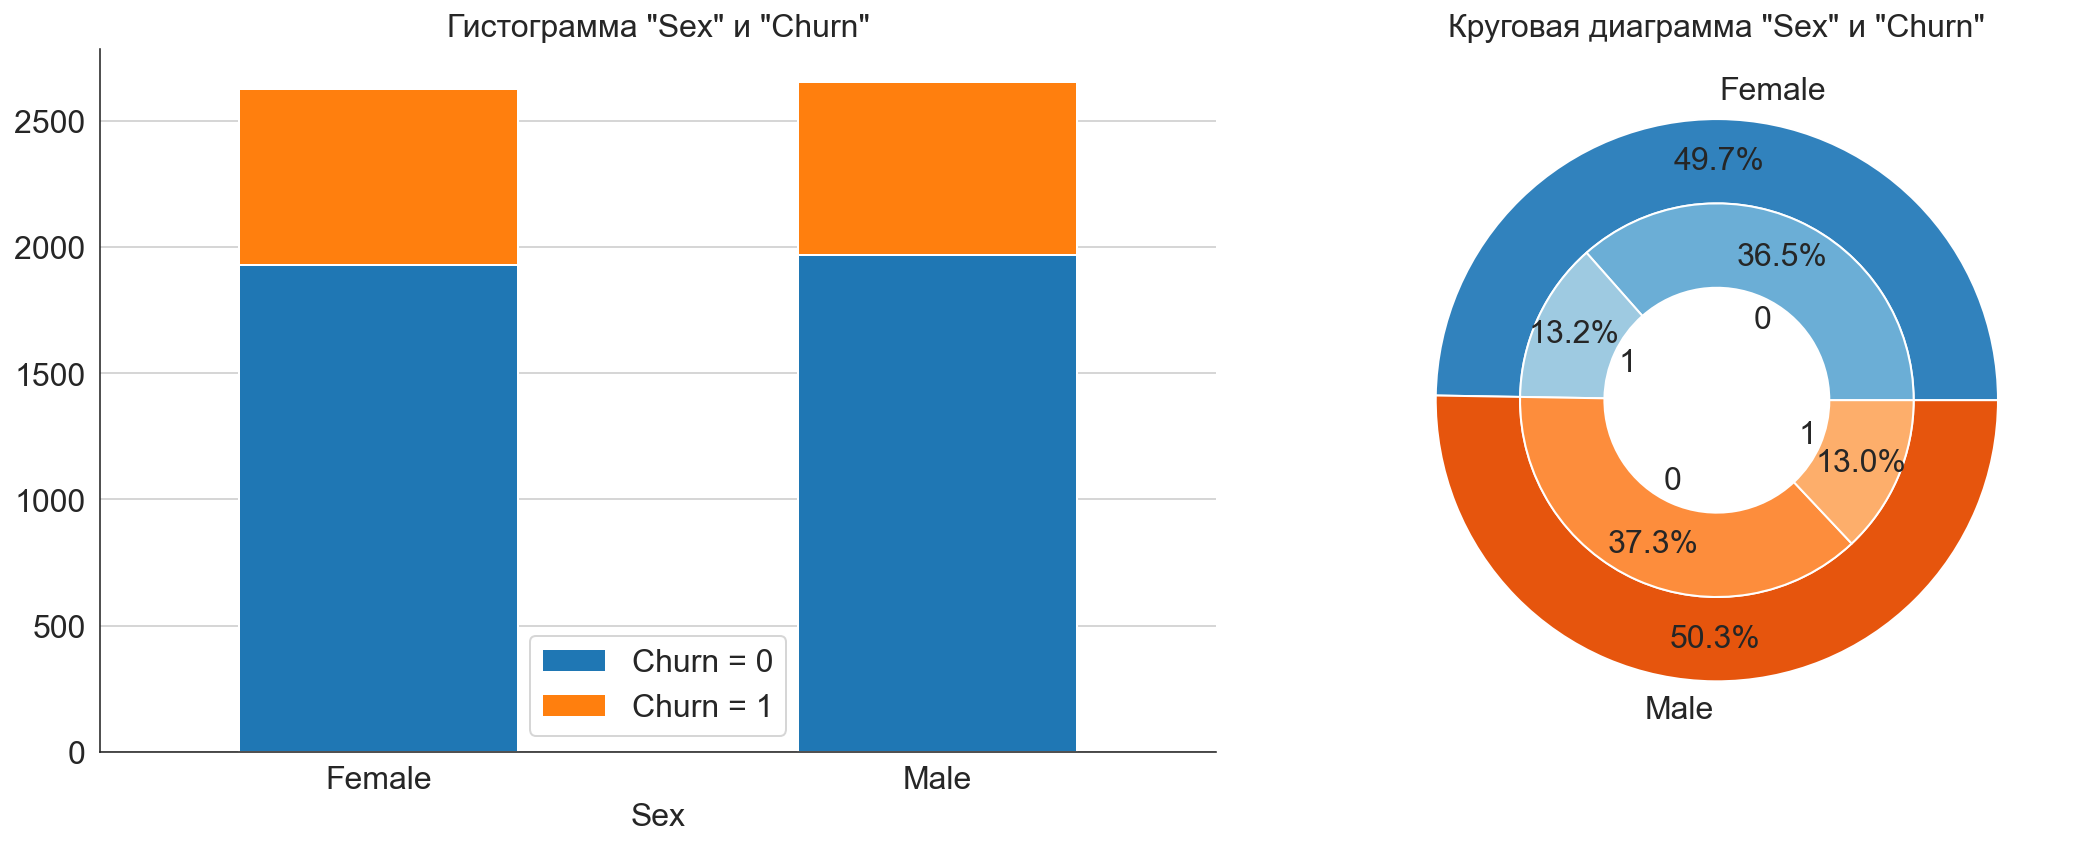

Количество            
Churn                    0     1 Всего
IsSeniorCitizen                       
0                     3410  1030  4440
1                      488   354   842
Всего                 3898  1384  5282

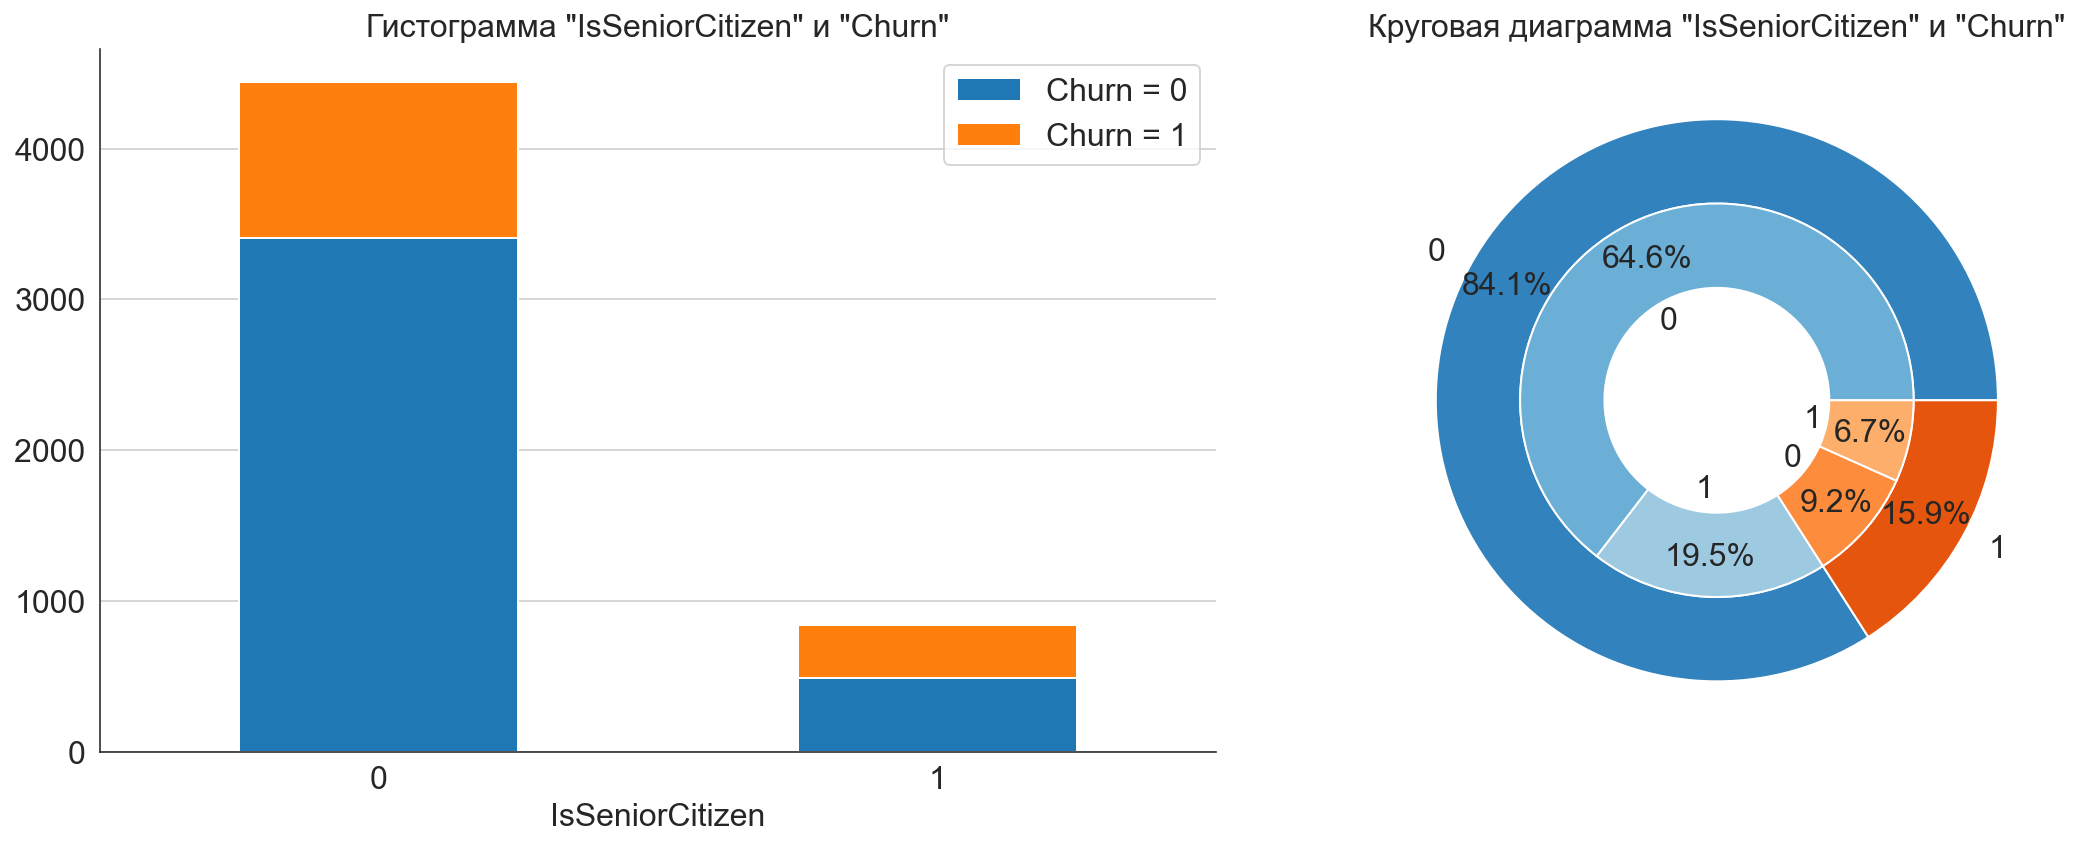

Количество            
Churn               0     1 Всего
HasPartner                       
No               1824   881  2705
Yes              2074   503  2577
Всего            3898  1384  5282

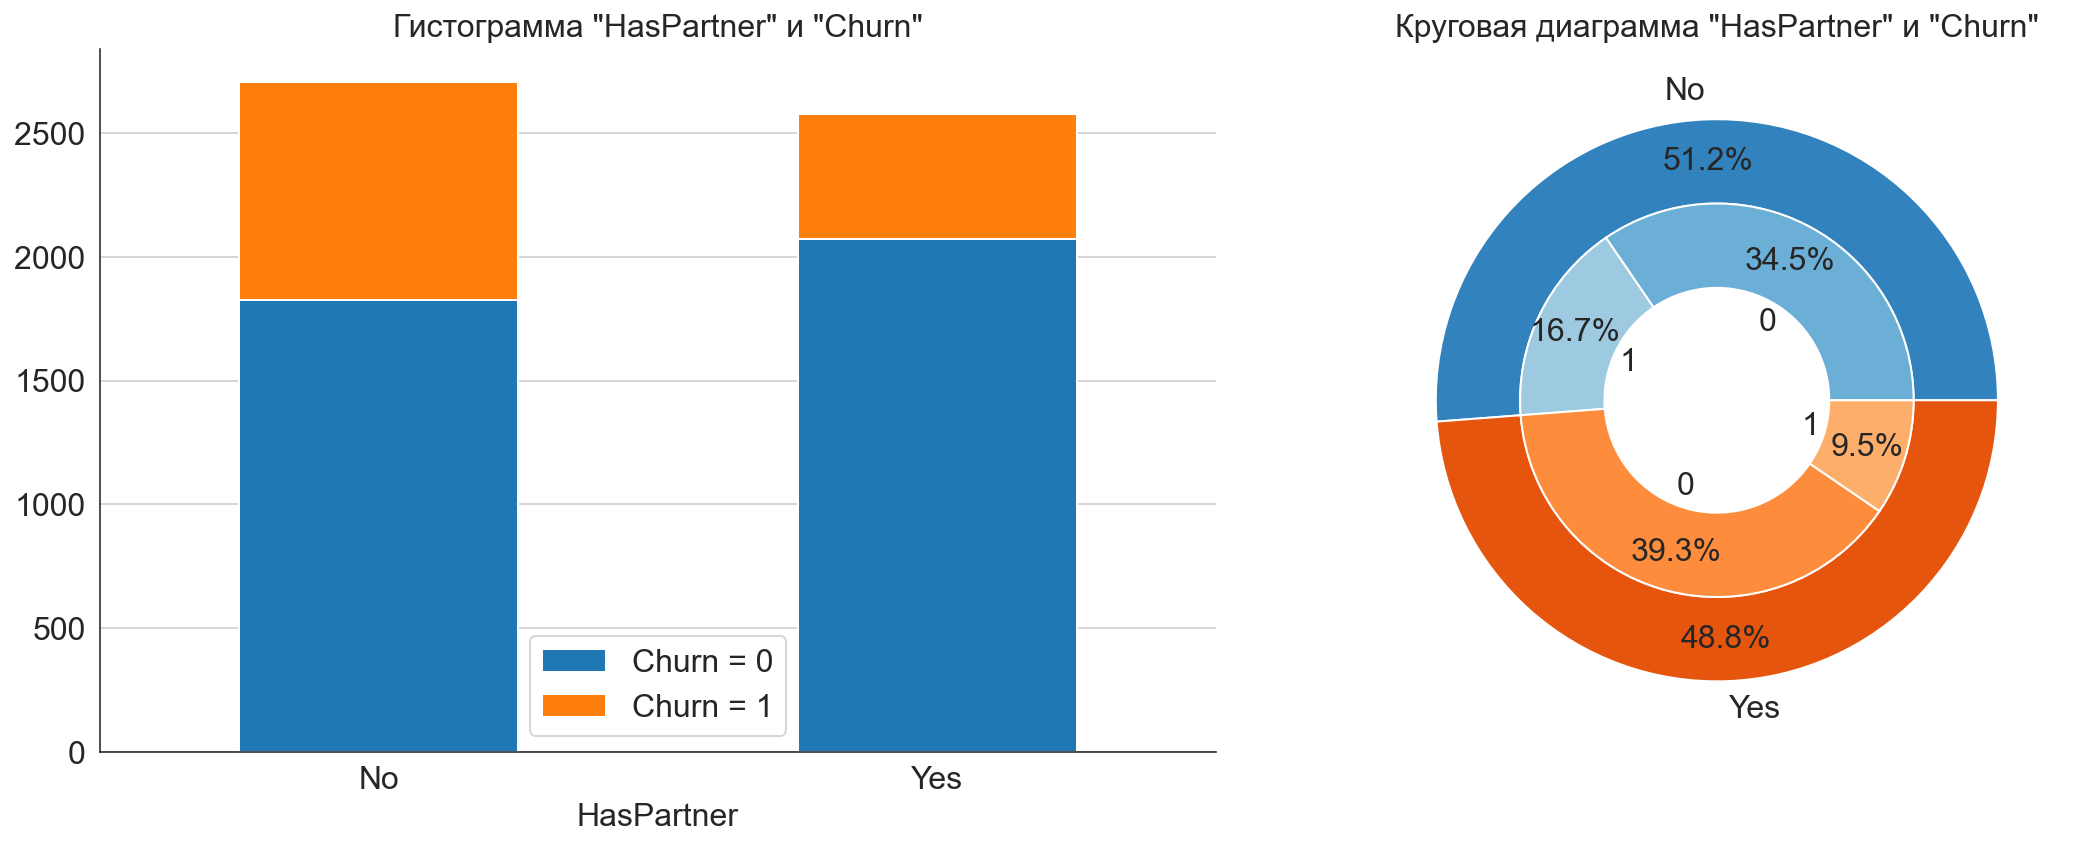

Количество            
Churn             0     1 Всего
HasChild                       
No             2538  1138  3676
Yes            1360   246  1606
Всего          3898  1384  5282

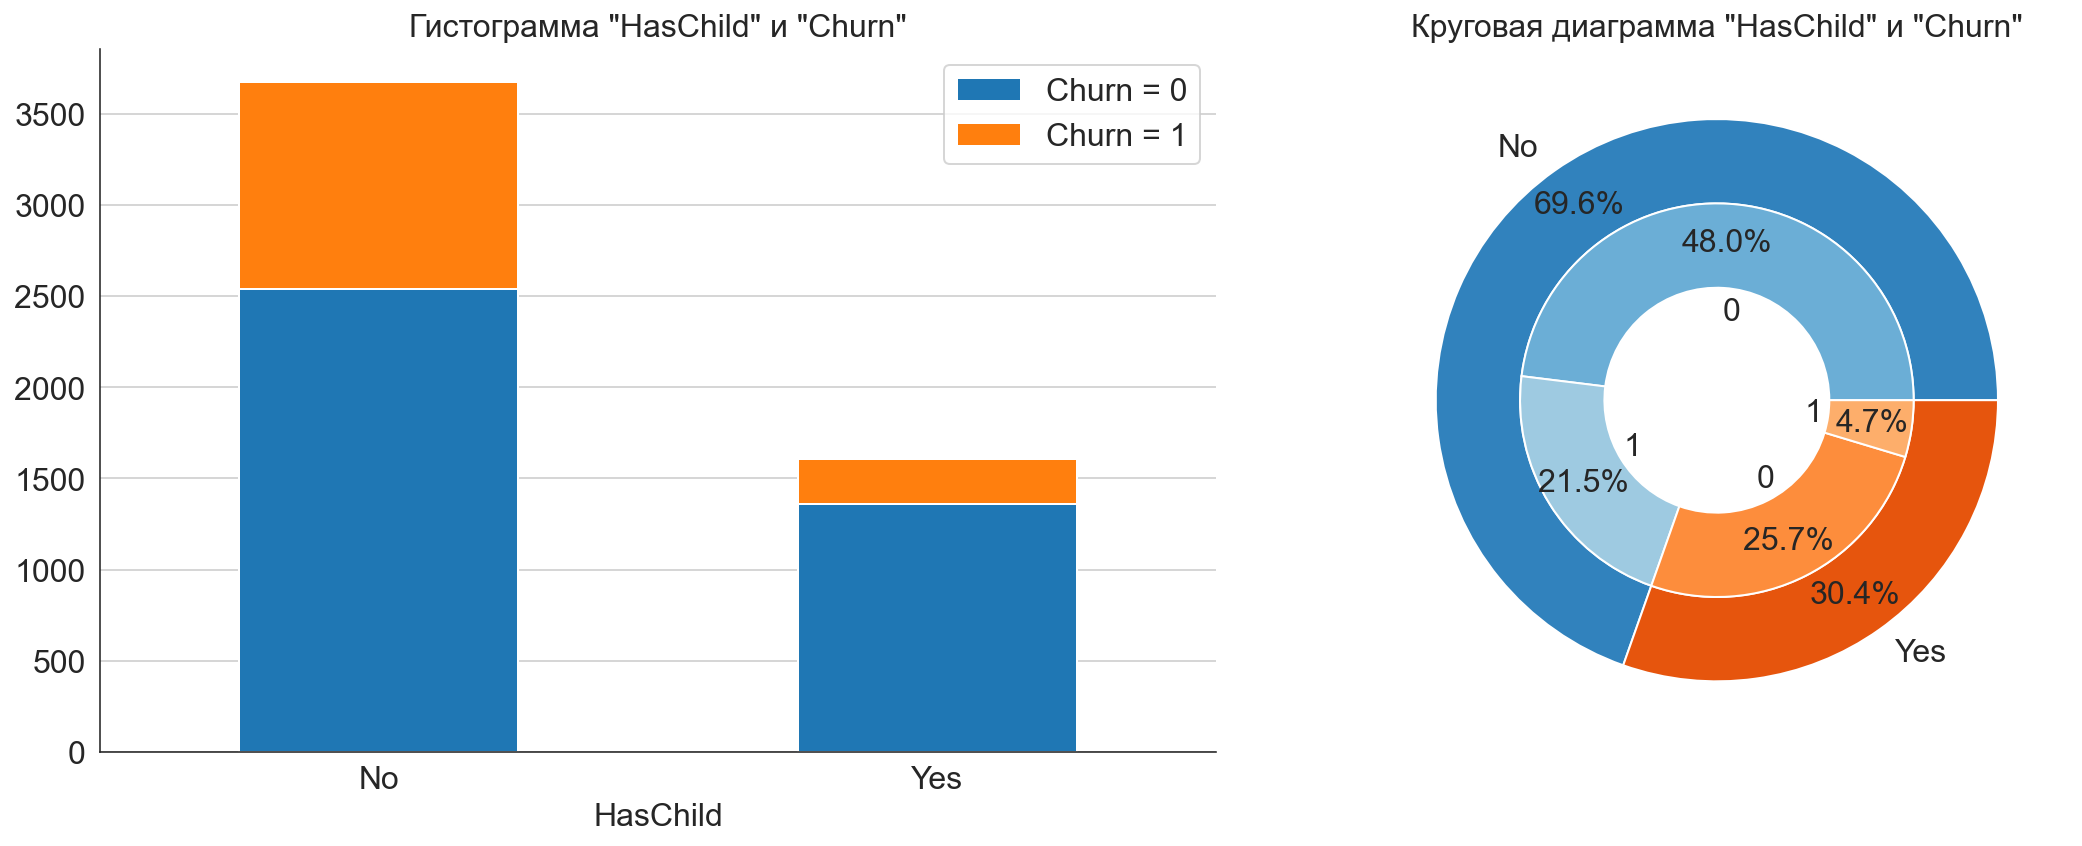

Количество            
Churn                    0     1 Всего
HasPhoneService                       
No                     392   129   521
Yes                   3506  1255  4761
Всего                 3898  1384  5282

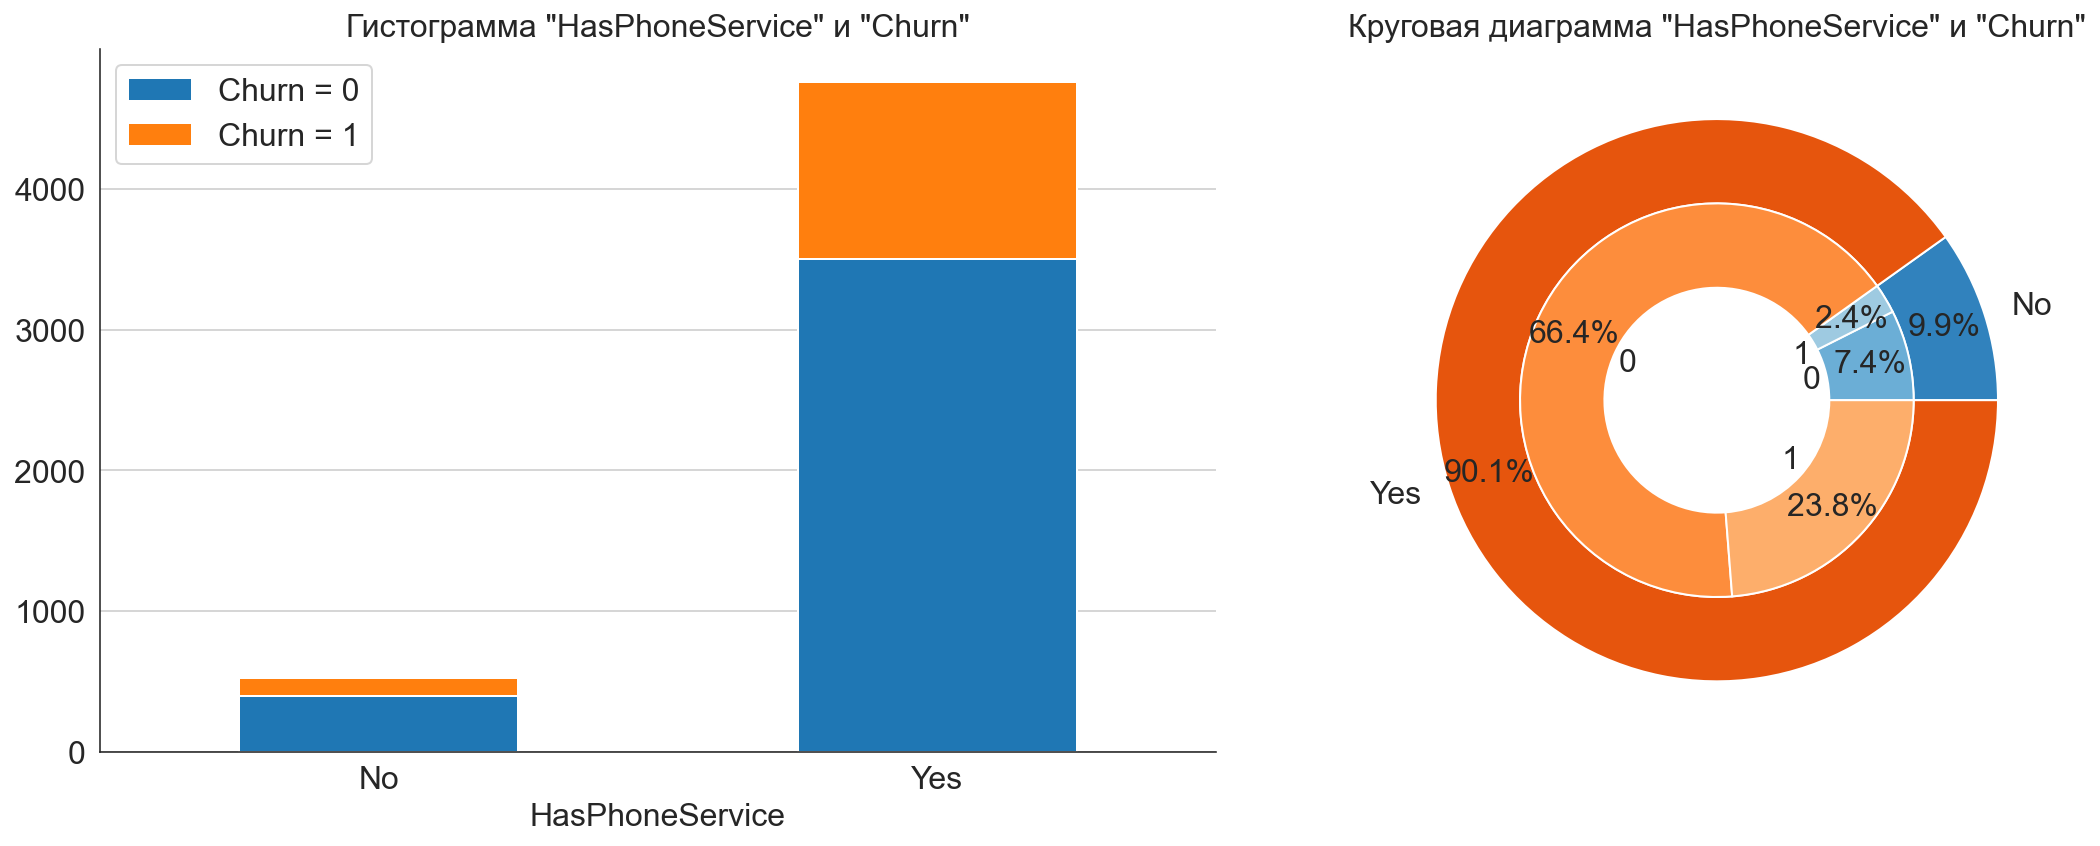

Количество            
Churn                            0     1 Всего
HasMultiplePhoneNumbers                       
No                            1891   620  2511
No phone service               392   129   521
Yes                           1615   635  2250
Всего                         3898  1384  5282

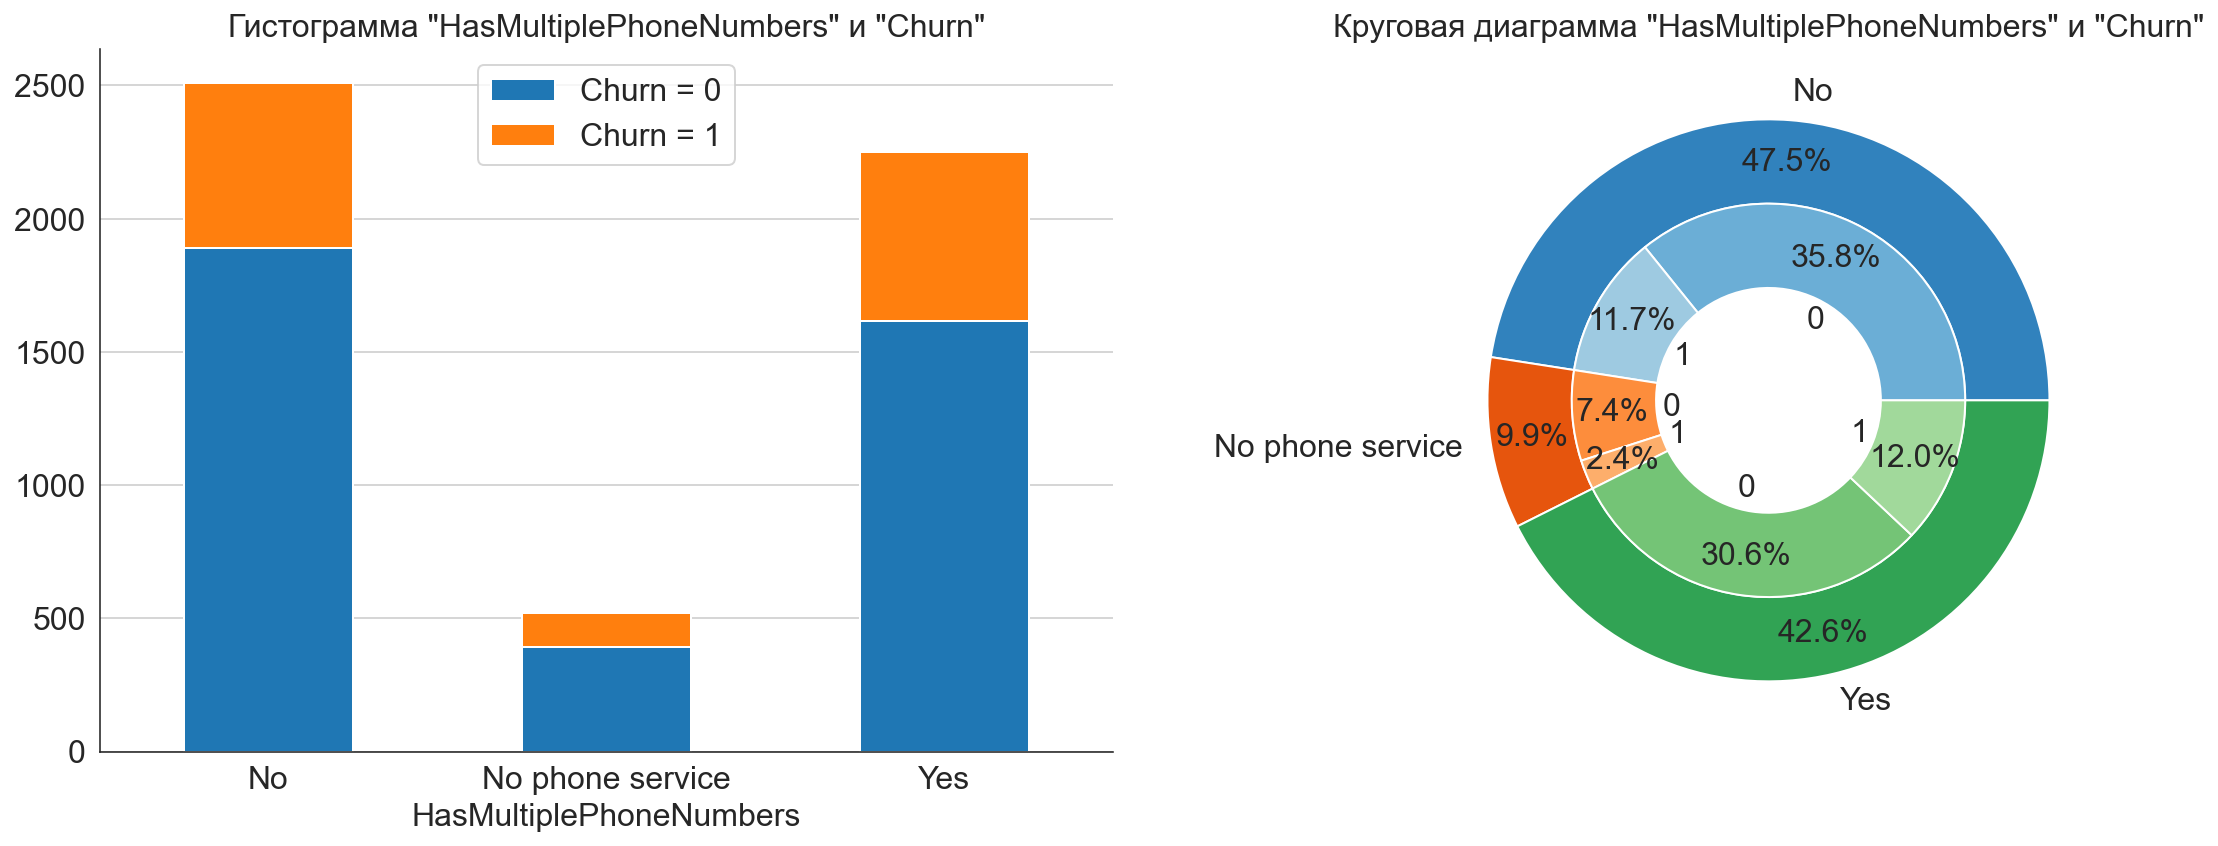

Количество            
Churn                       0     1 Всего
HasInternetService                       
DSL                      1458   342  1800
Fiber optic              1381   960  2341
No                       1059    82  1141
Всего                    3898  1384  5282

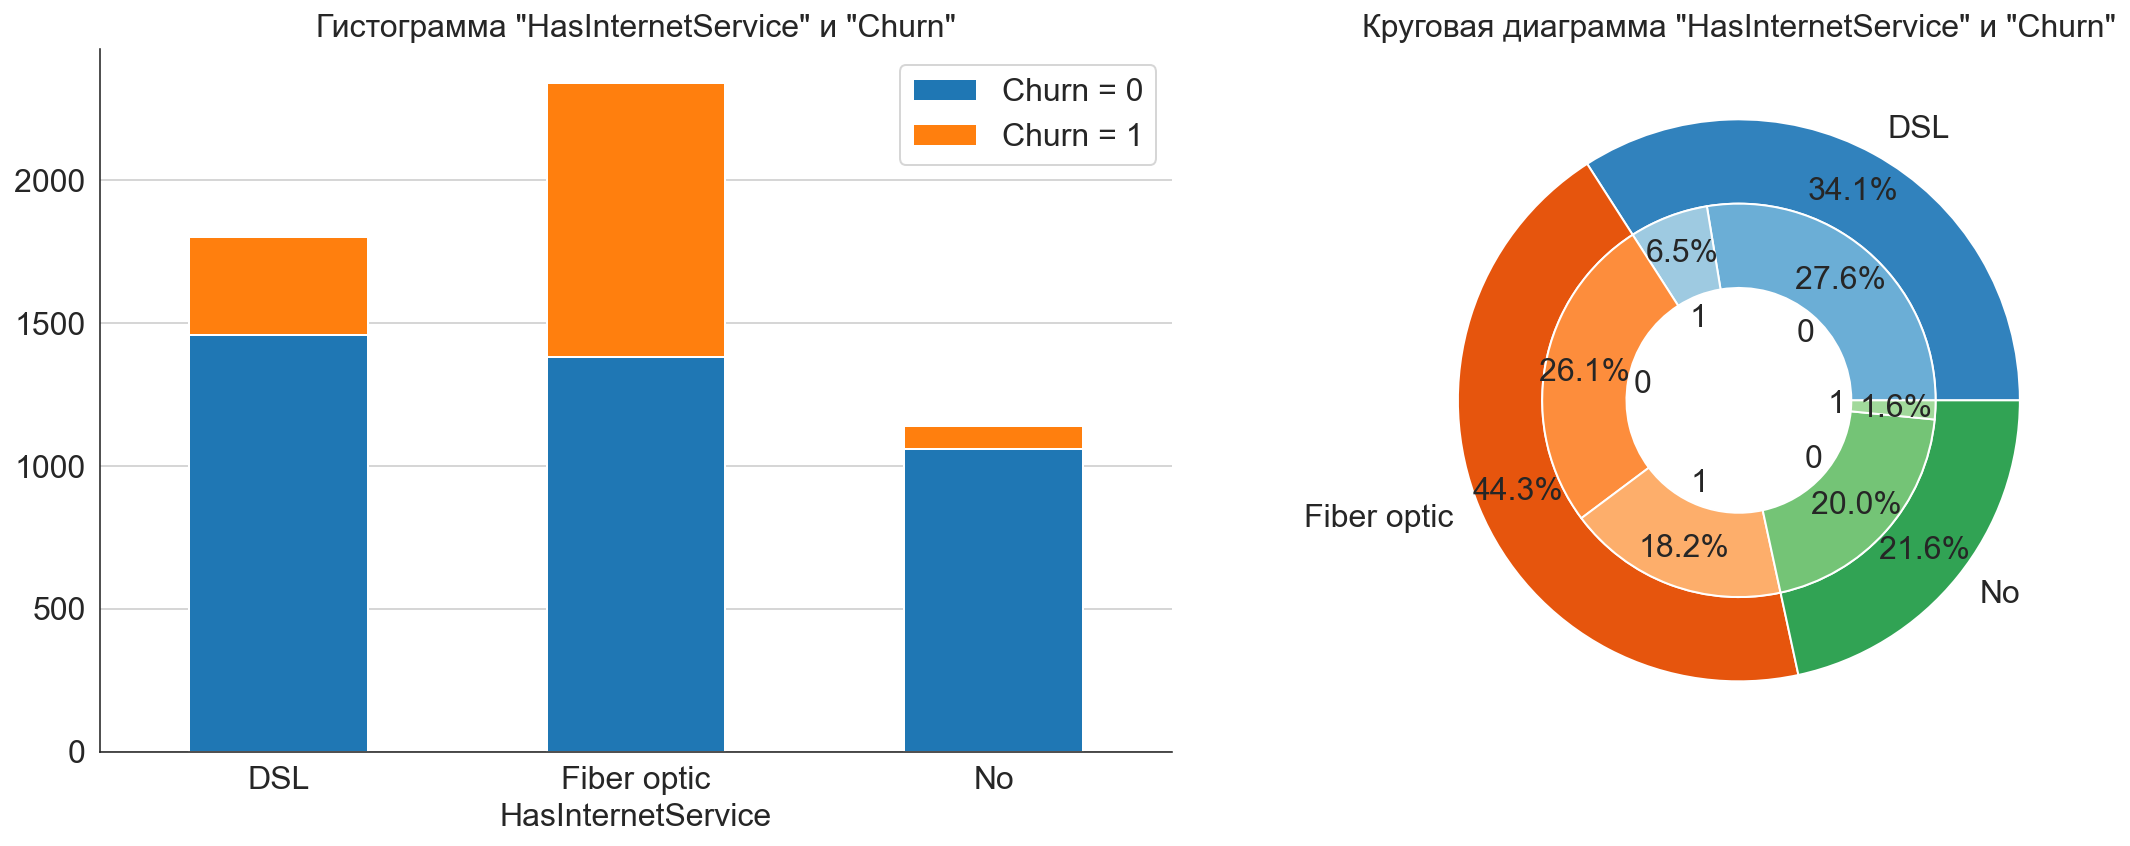

Количество            
Churn                             0     1 Всего
HasOnlineSecurityService                       
No                             1518  1094  2612
No internet service            1059    82  1141
Yes                            1321   208  1529
Всего                          3898  1384  5282

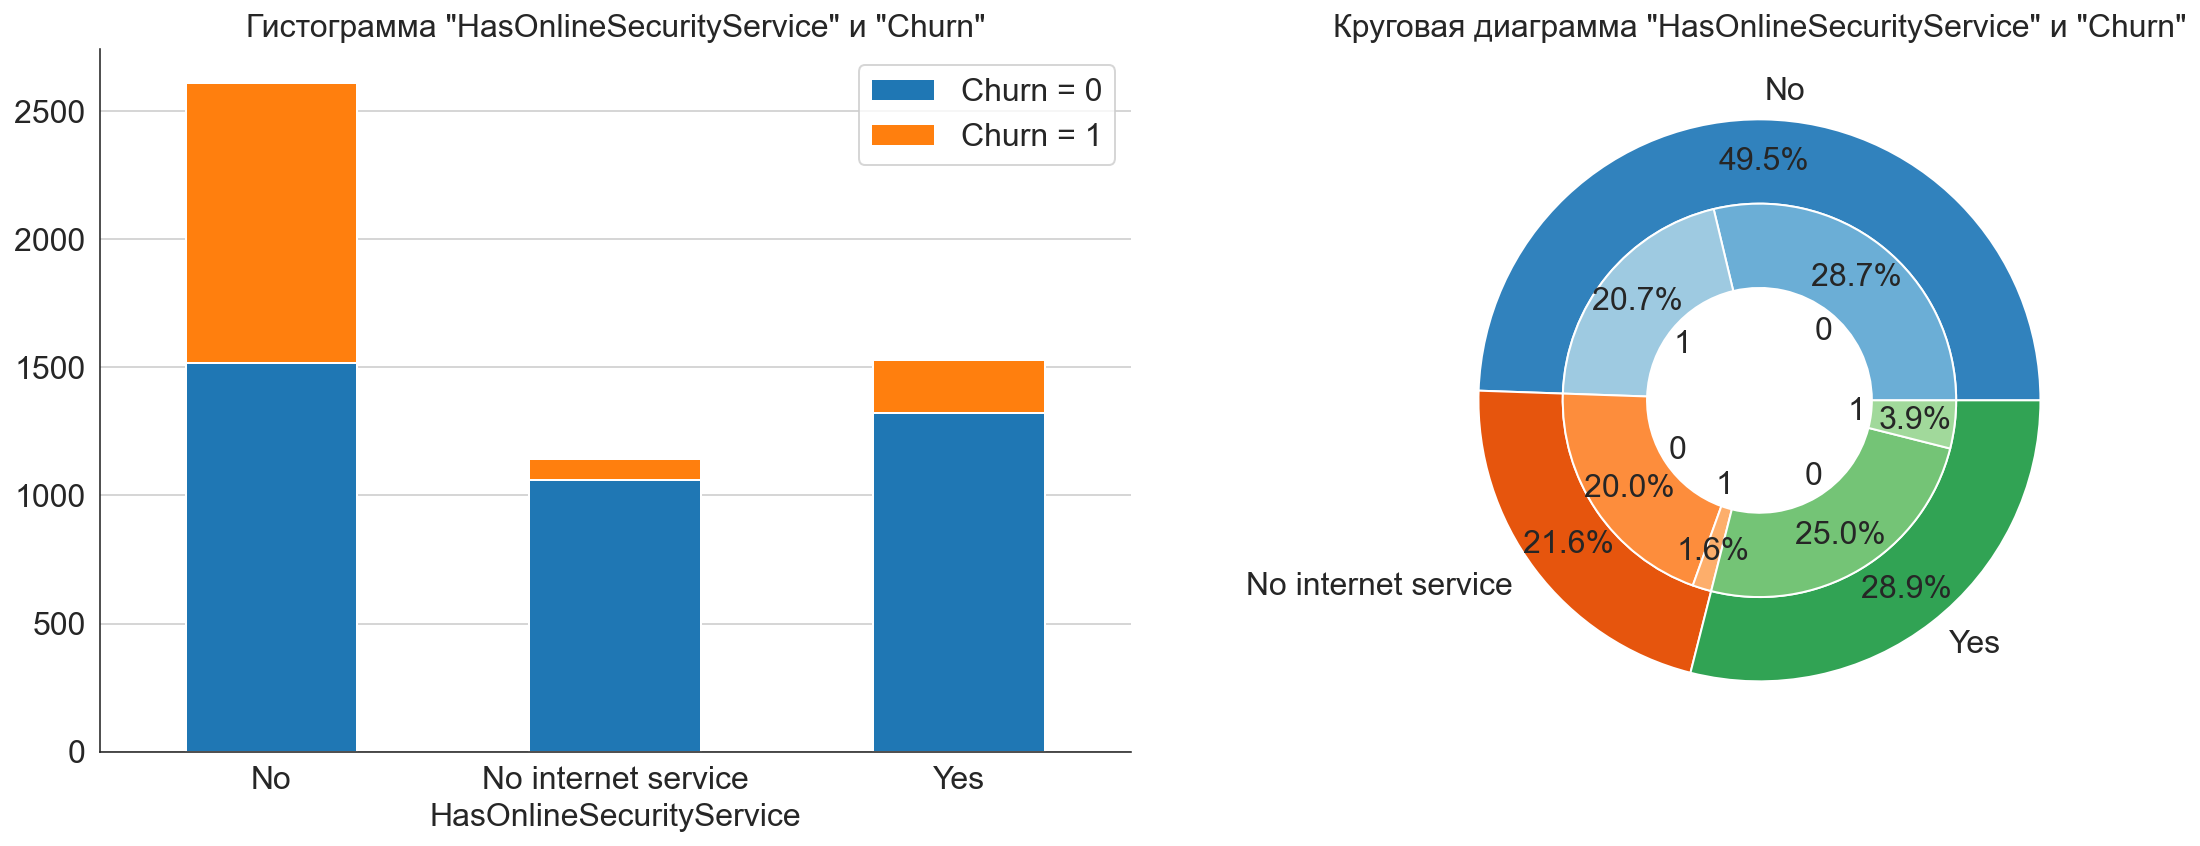

Количество            
Churn                        0     1 Всего
HasOnlineBackup                           
No                        1407   925  2332
No internet service       1059    82  1141
Yes                       1432   377  1809
Всего                     3898  1384  5282

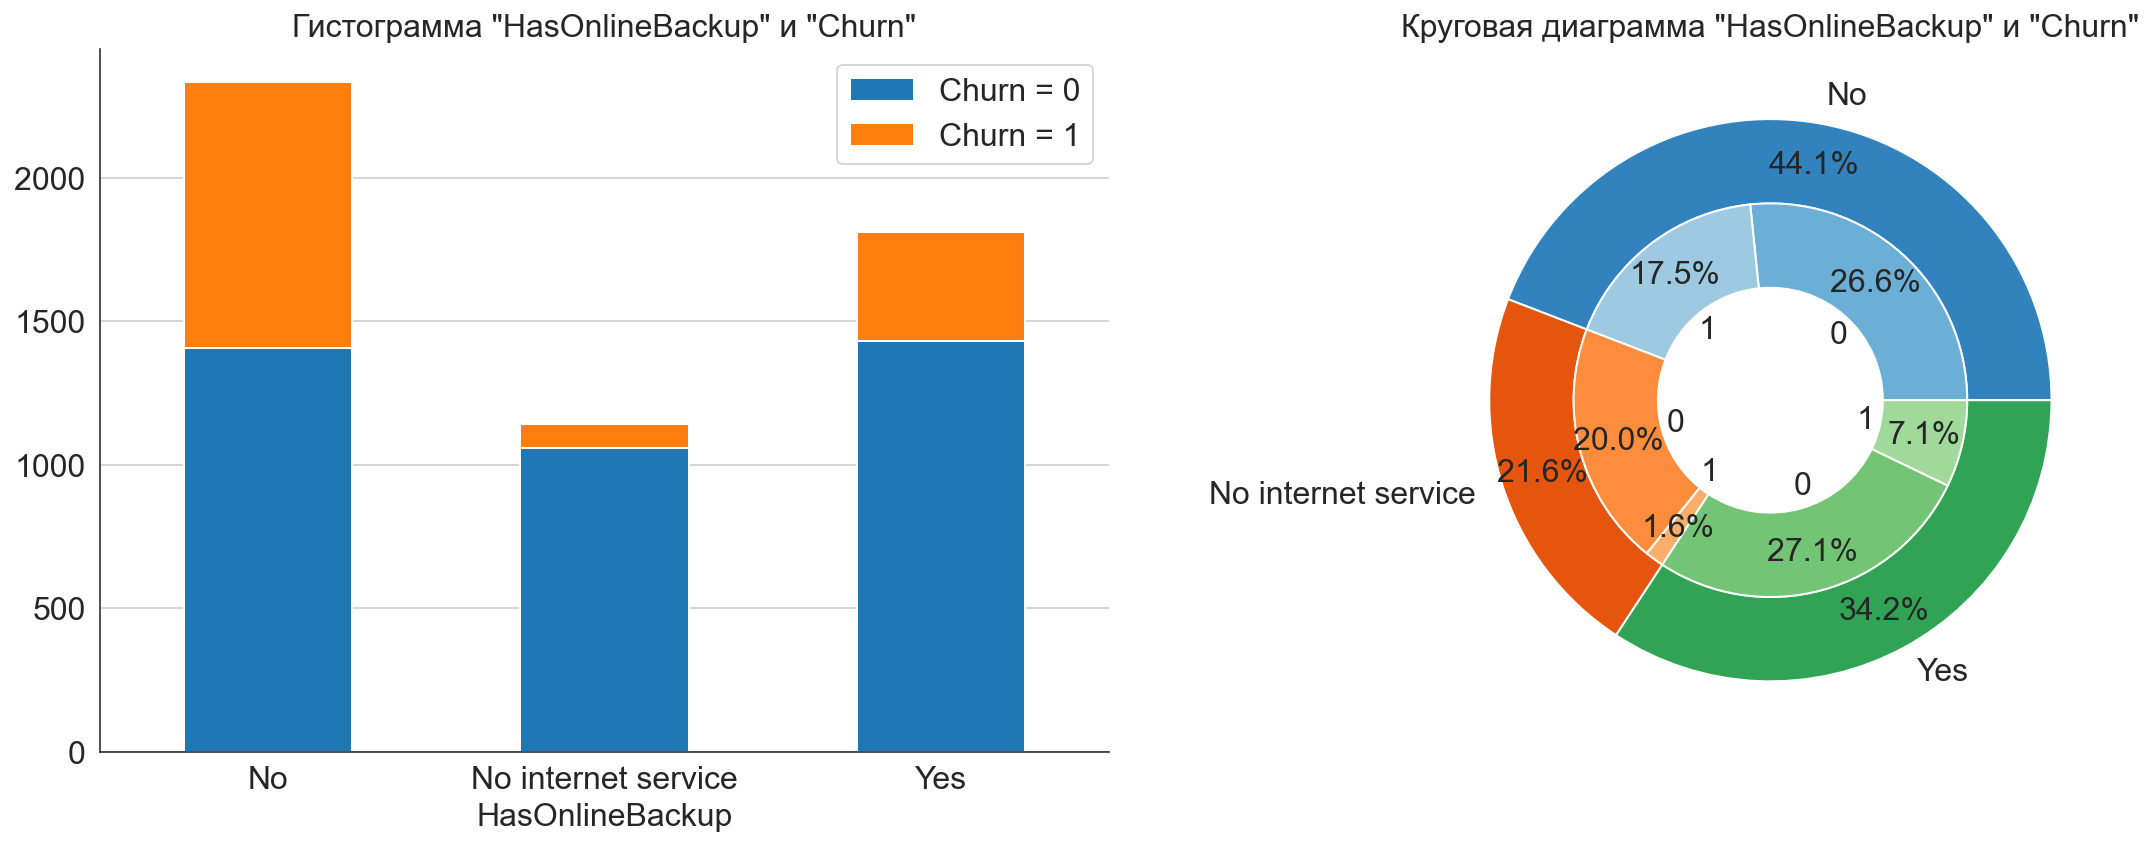

Количество            
Churn                        0     1 Всего
HasDeviceProtection                       
No                        1417   900  2317
No internet service       1059    82  1141
Yes                       1422   402  1824
Всего                     3898  1384  5282

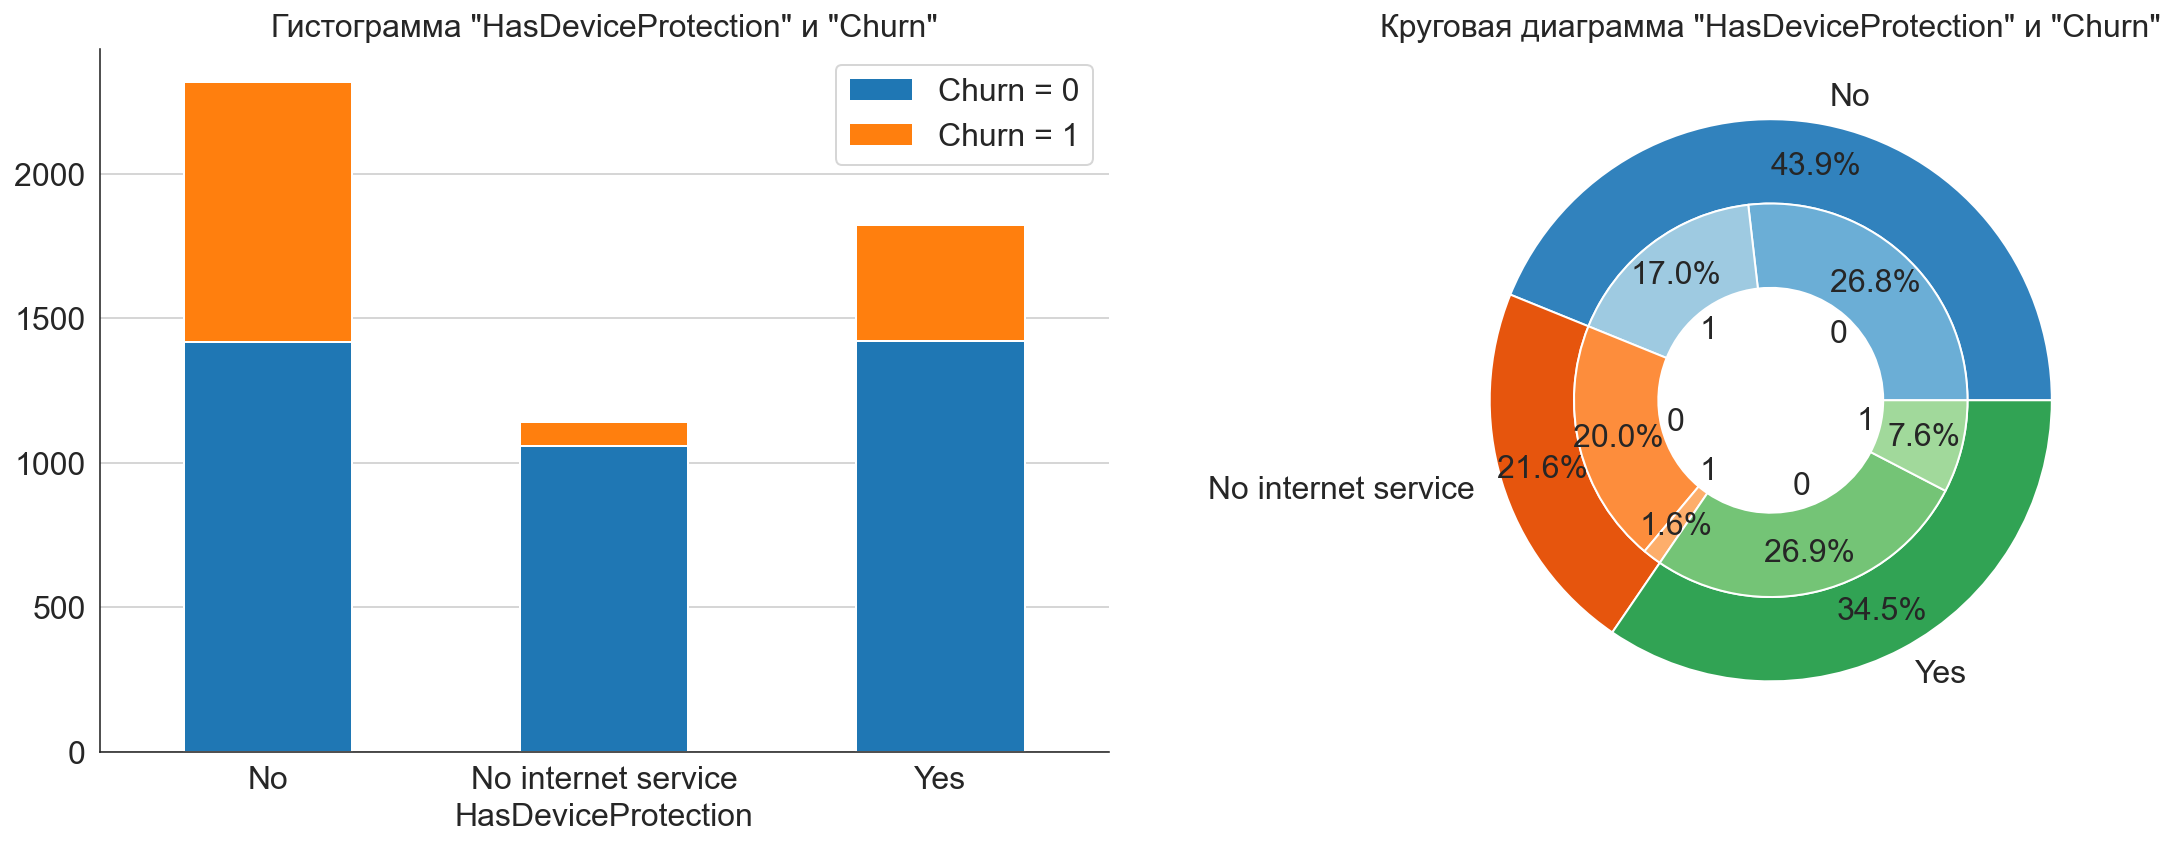

Количество            
Churn                         0     1 Всего
HasTechSupportAccess                       
No                         1530  1074  2604
No internet service        1059    82  1141
Yes                        1309   228  1537
Всего                      3898  1384  5282

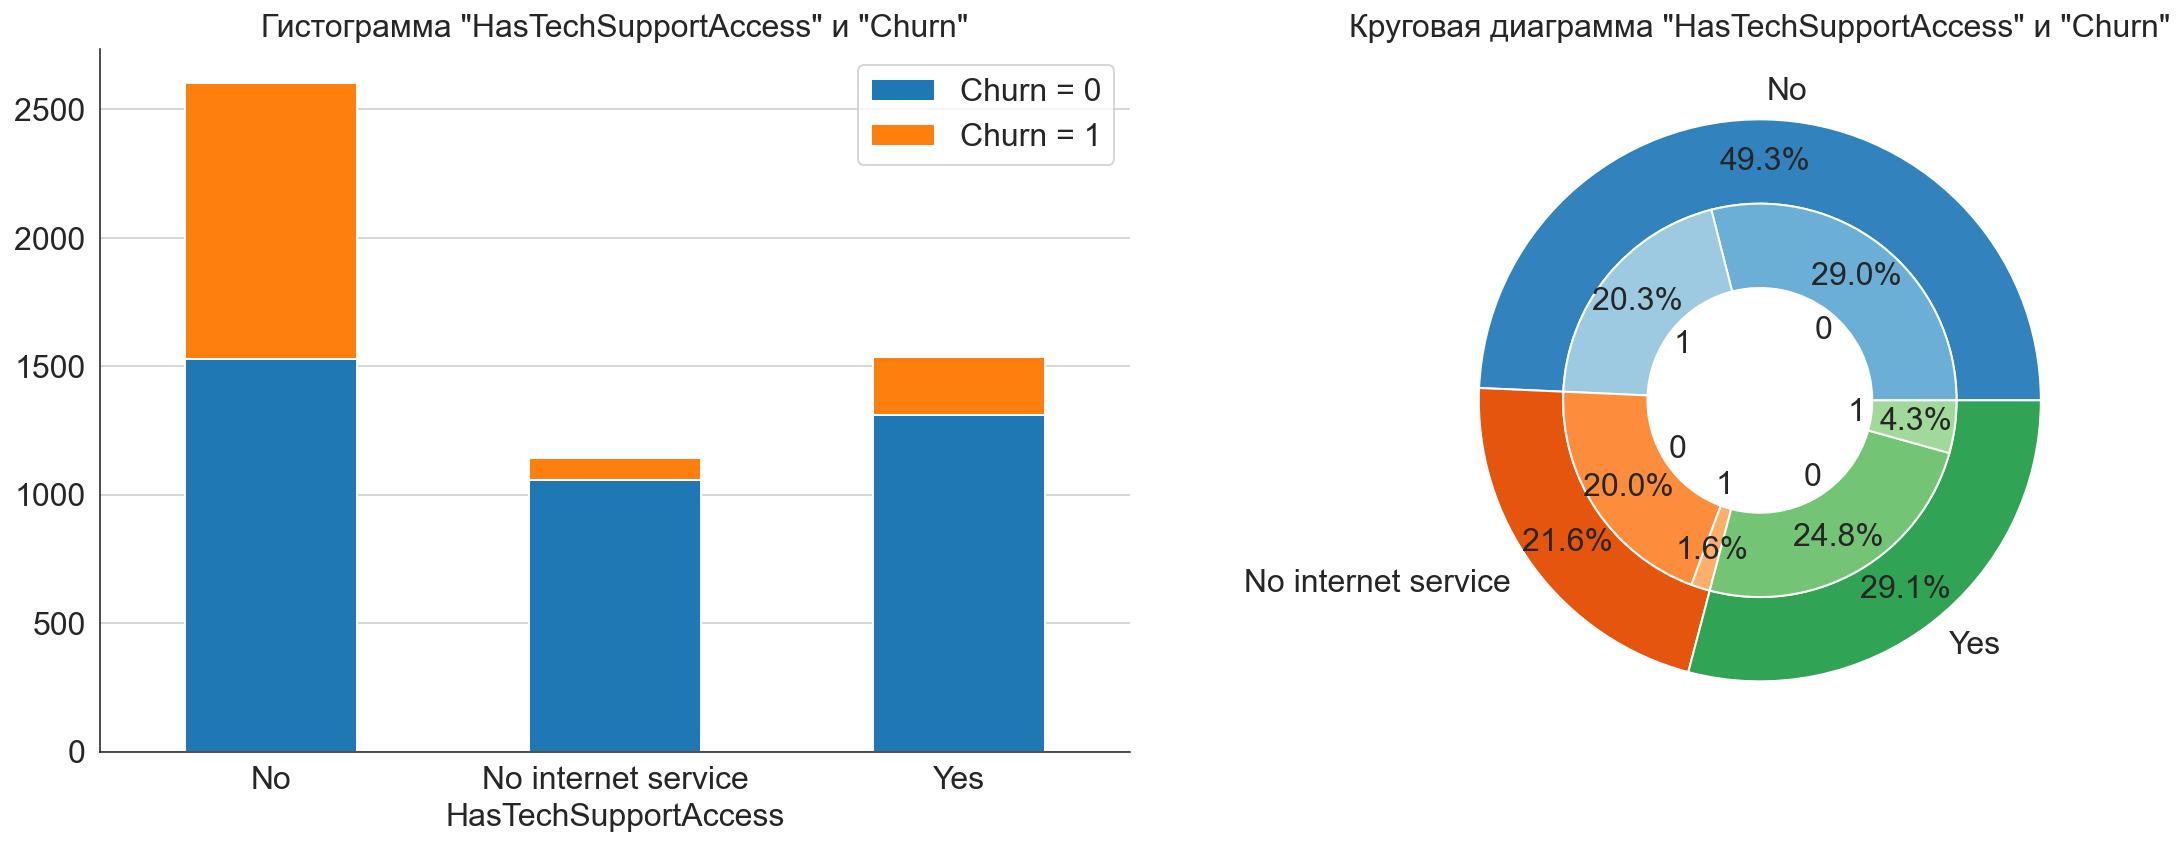

Количество            
Churn                        0     1 Всего
HasOnlineTV                               
No                        1399   700  2099
No internet service       1059    82  1141
Yes                       1440   602  2042
Всего                     3898  1384  5282

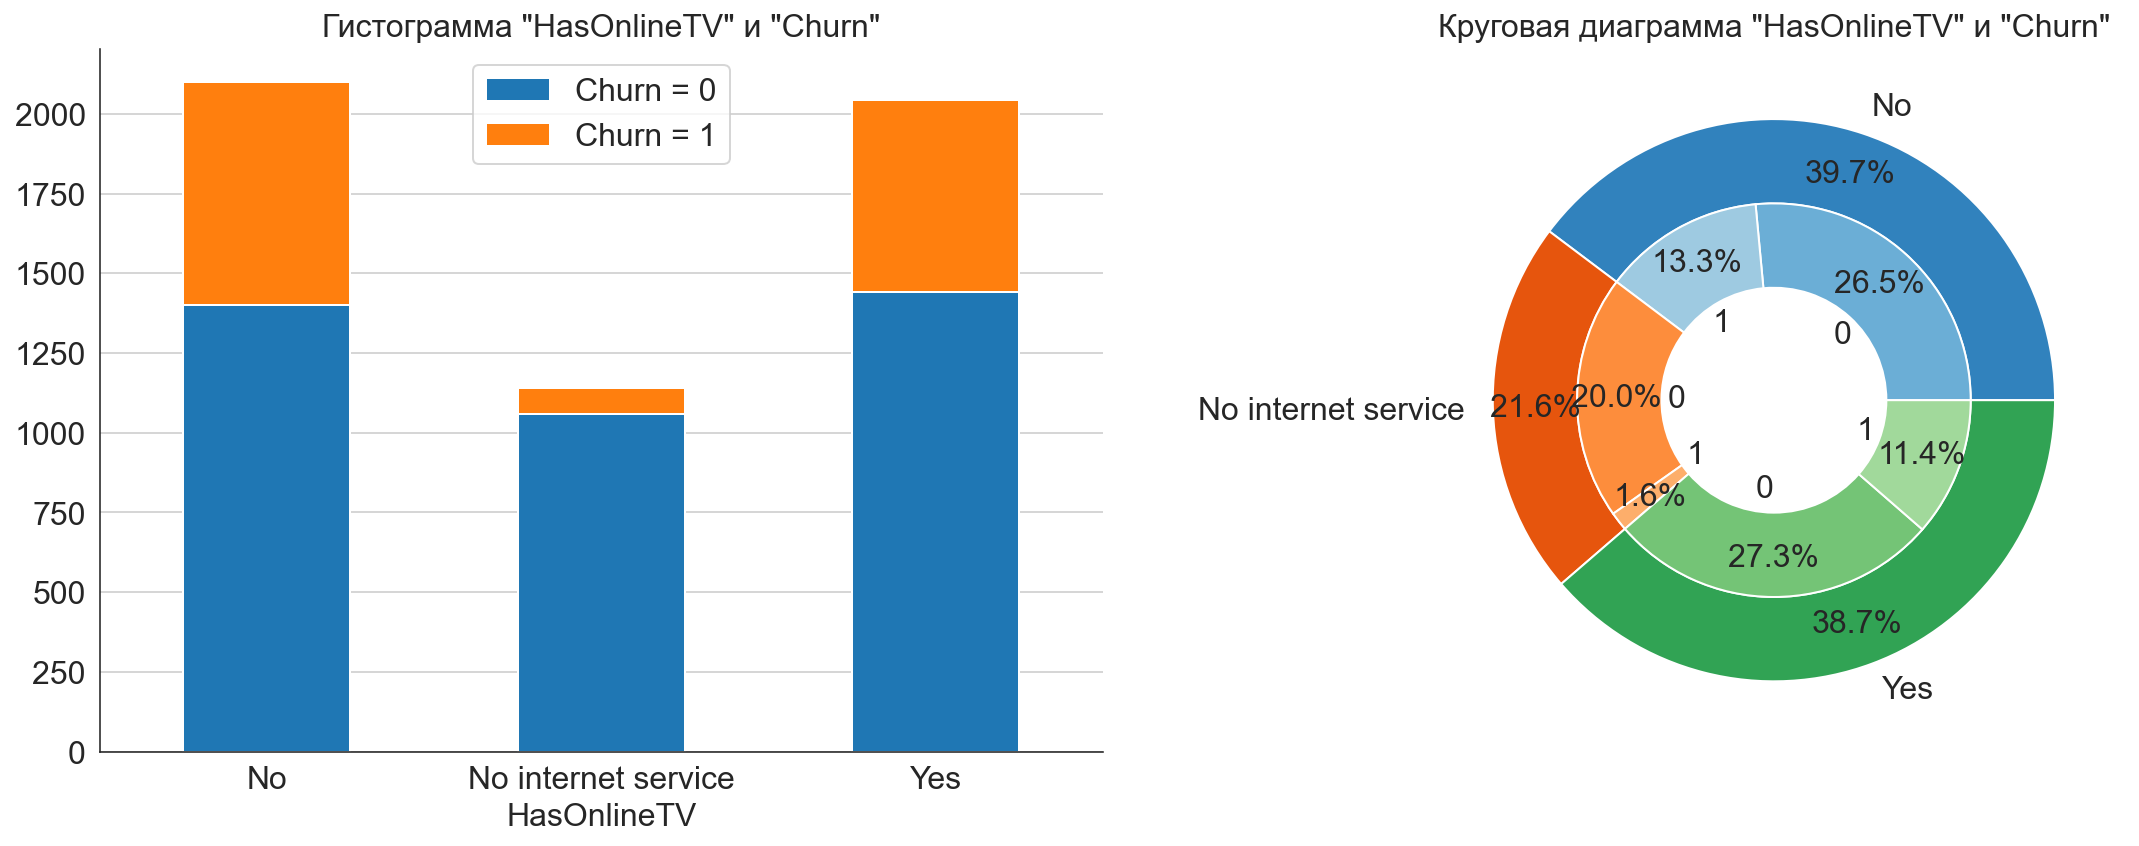

Количество            
Churn                         0     1 Всего
HasMovieSubscription                       
No                         1376   705  2081
No internet service        1059    82  1141
Yes                        1463   597  2060
Всего                      3898  1384  5282

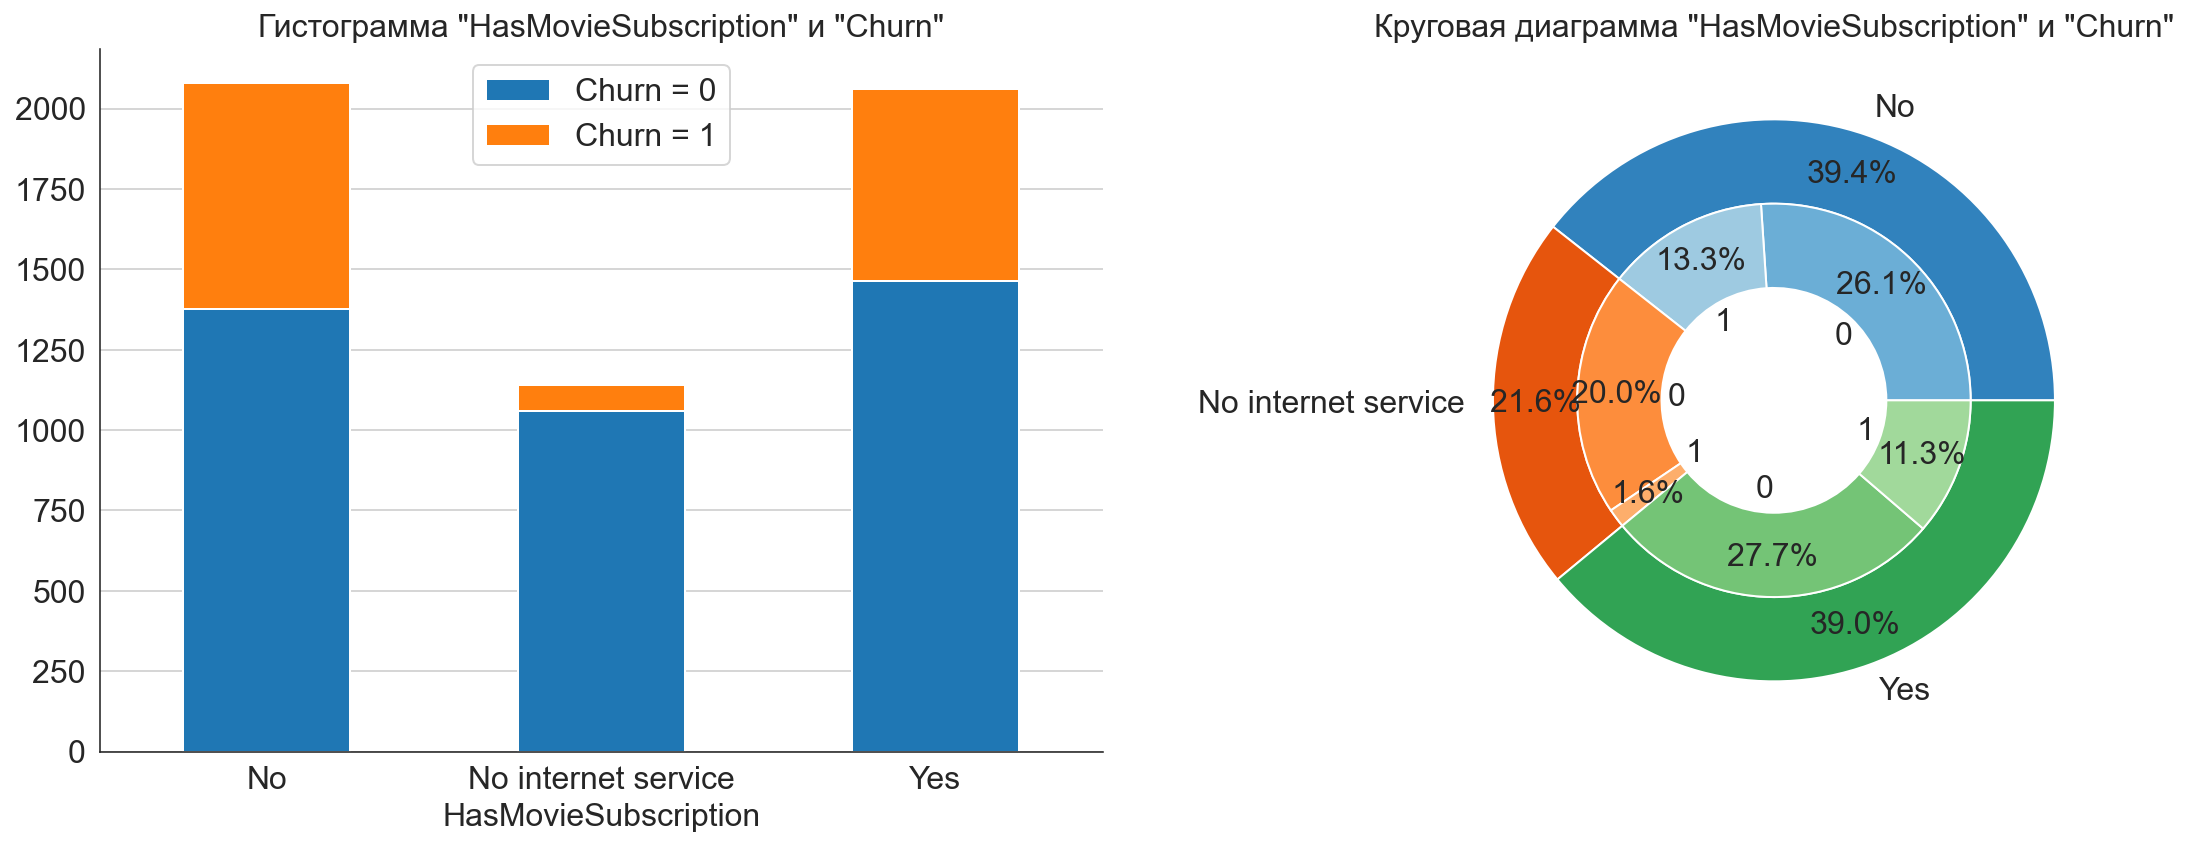

Количество            
Churn                     0     1 Всего
HasContractPhone                       
Month-to-month         1689  1231  2920
One year                962   120  1082
Two year               1247    33  1280
Всего                  3898  1384  5282

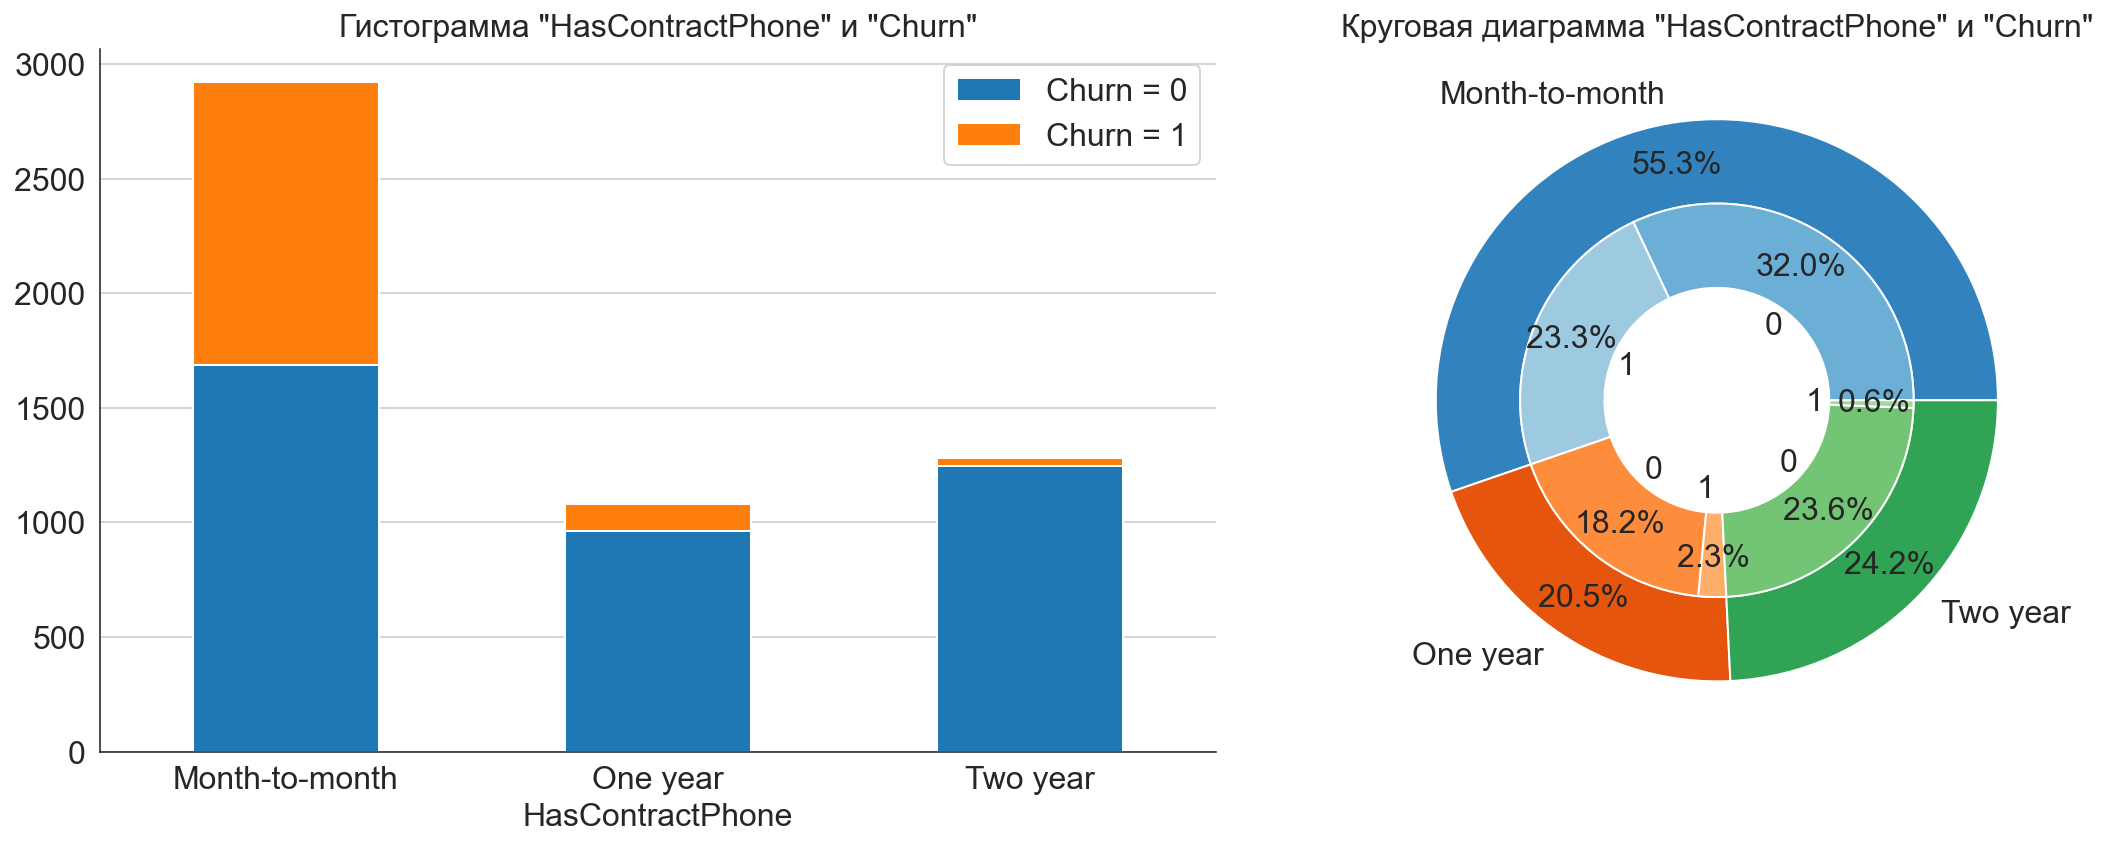

Количество            
Churn                       0     1 Всего
IsBillingPaperless                       
No                       1796   338  2134
Yes                      2102  1046  3148
Всего                    3898  1384  5282

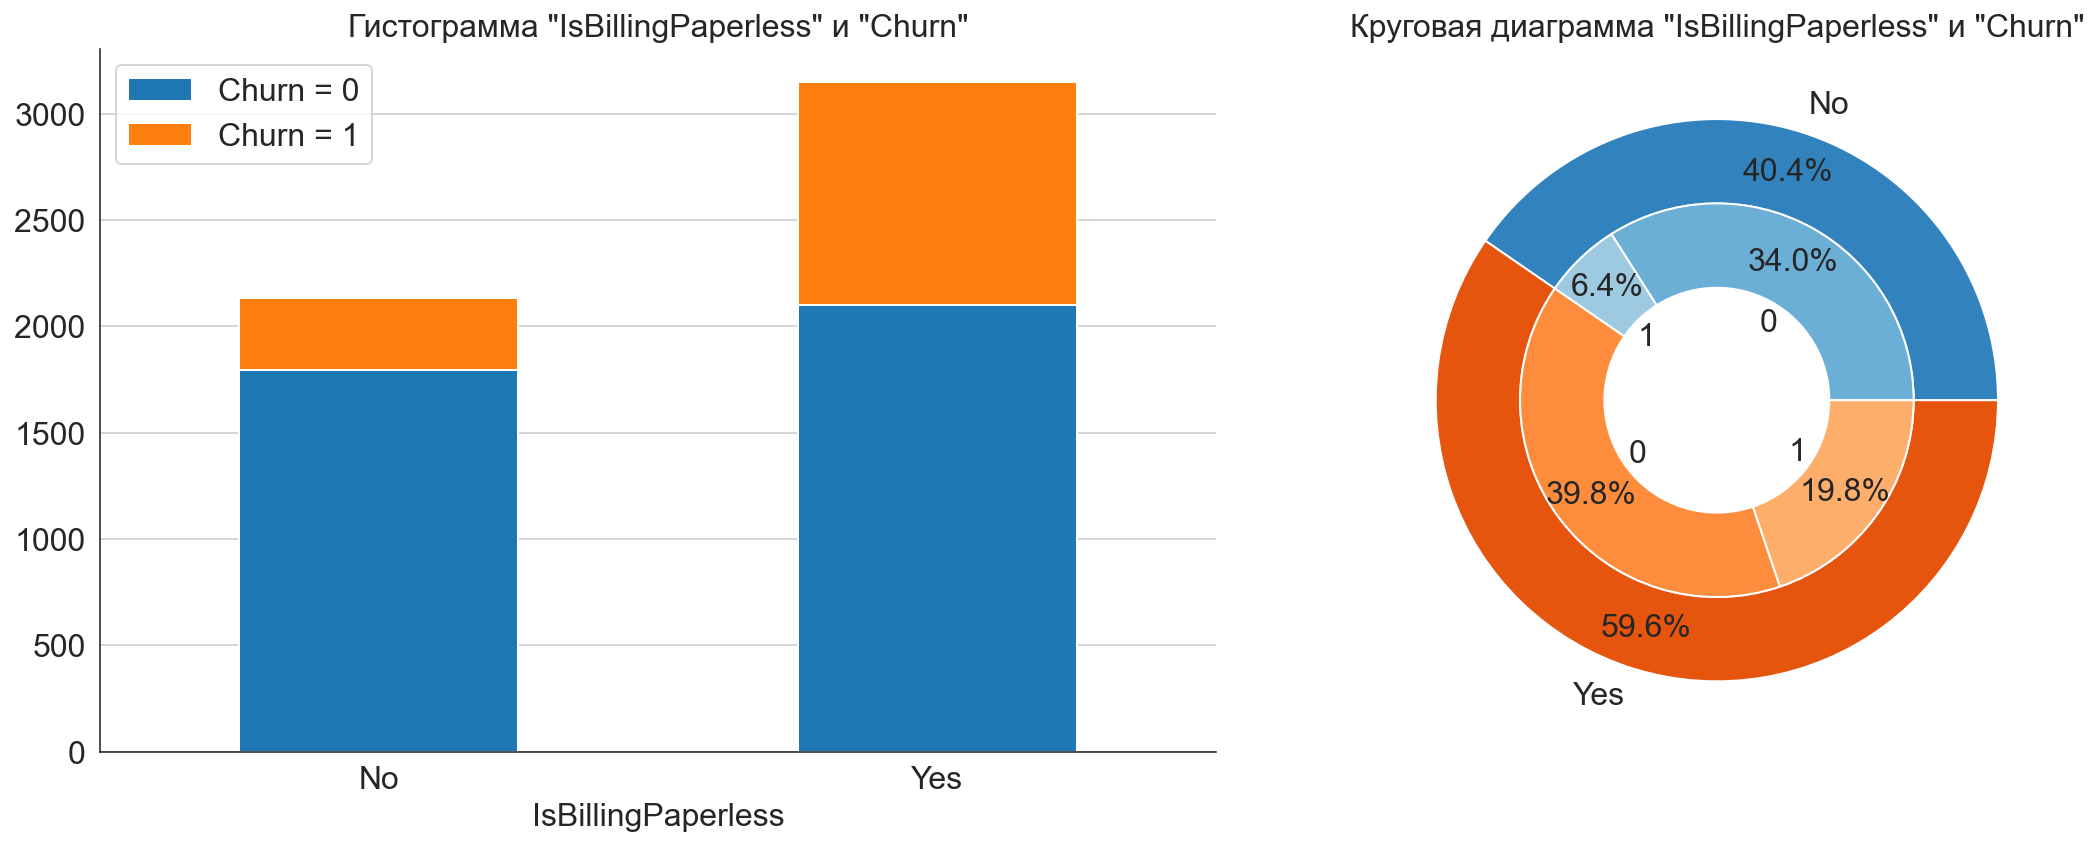

Количество            
Churn                              0     1 Всего
PaymentMethod                                   
Bank transfer (automatic)        964   195  1159
Credit card (automatic)          978   165  1143
Electronic check                 992   794  1786
Mailed check                     964   230  1194
Всего                           3898  1384  5282

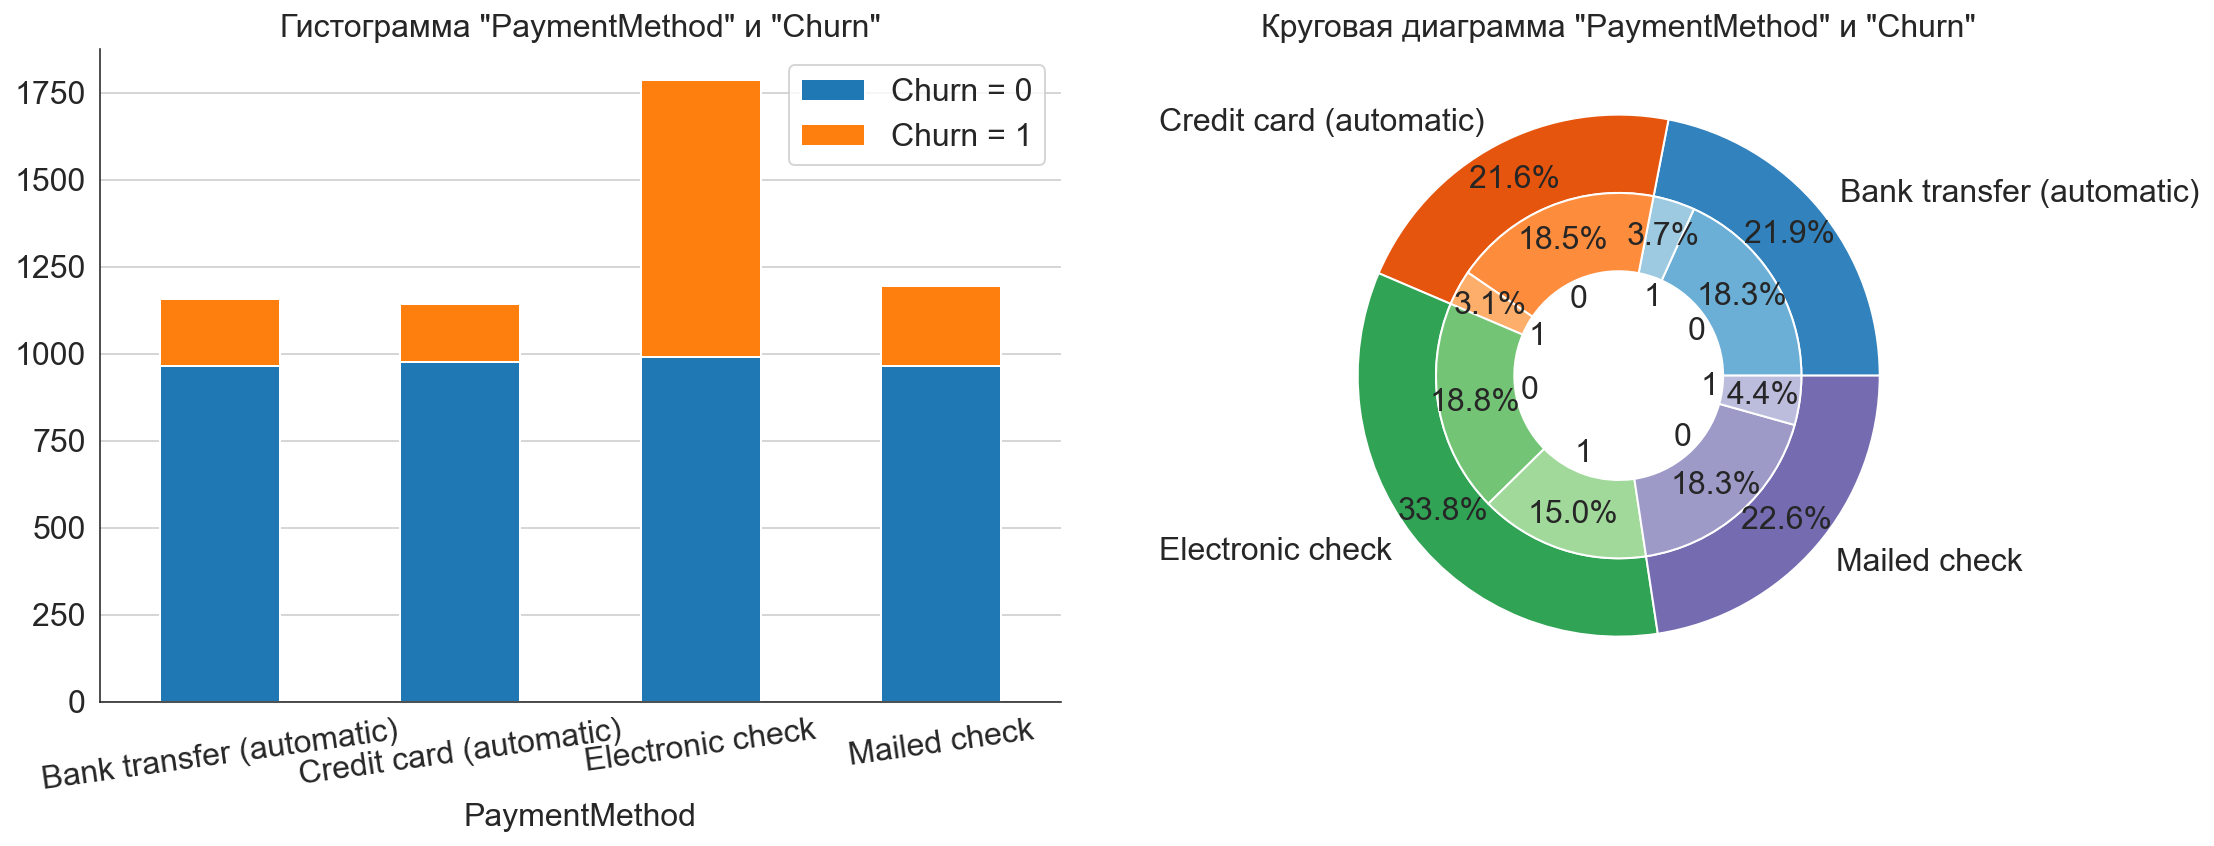

In [31]:
show_category_info(data, cat_cols)

Судя по гистограммам и круговым диаграммам, среди категориальных признаков нет линейно зависимых с целевой переменной.

### Распределение целевой переменной

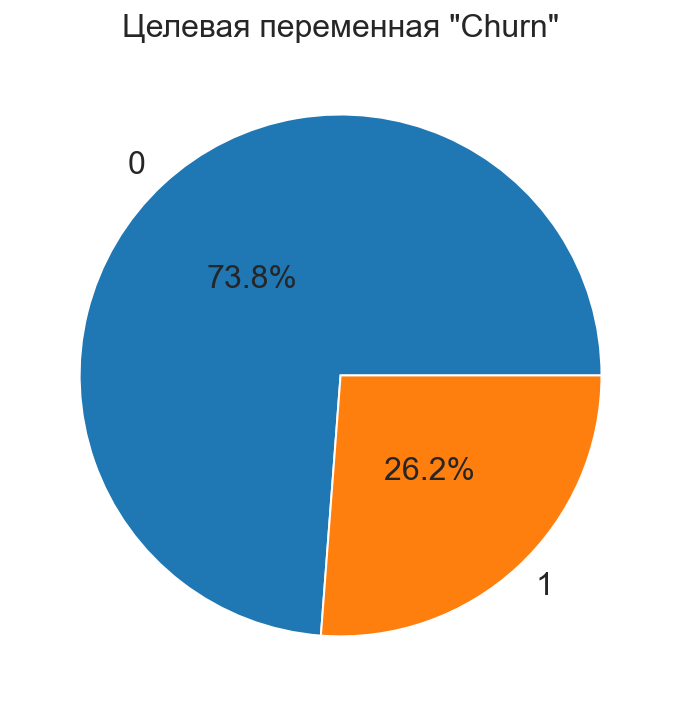

In [32]:
data[target_col].value_counts().plot.pie(textprops={'fontsize': medium},
                                         autopct='%1.1f%%', pctdistance=0.5,
                                         title=f'Целевая переменная "{target_col}"', ylabel='')
plt.show()

В нашей задаче не следует использовать accuracy как метрику, так как количество объектов класса "0" почти в четыре раза больше количества класса "1". При такой разнице, как представляется, применять особые методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0) не потребуется.

### Использование дополнительных библиотек визуализации

#### Seaborn

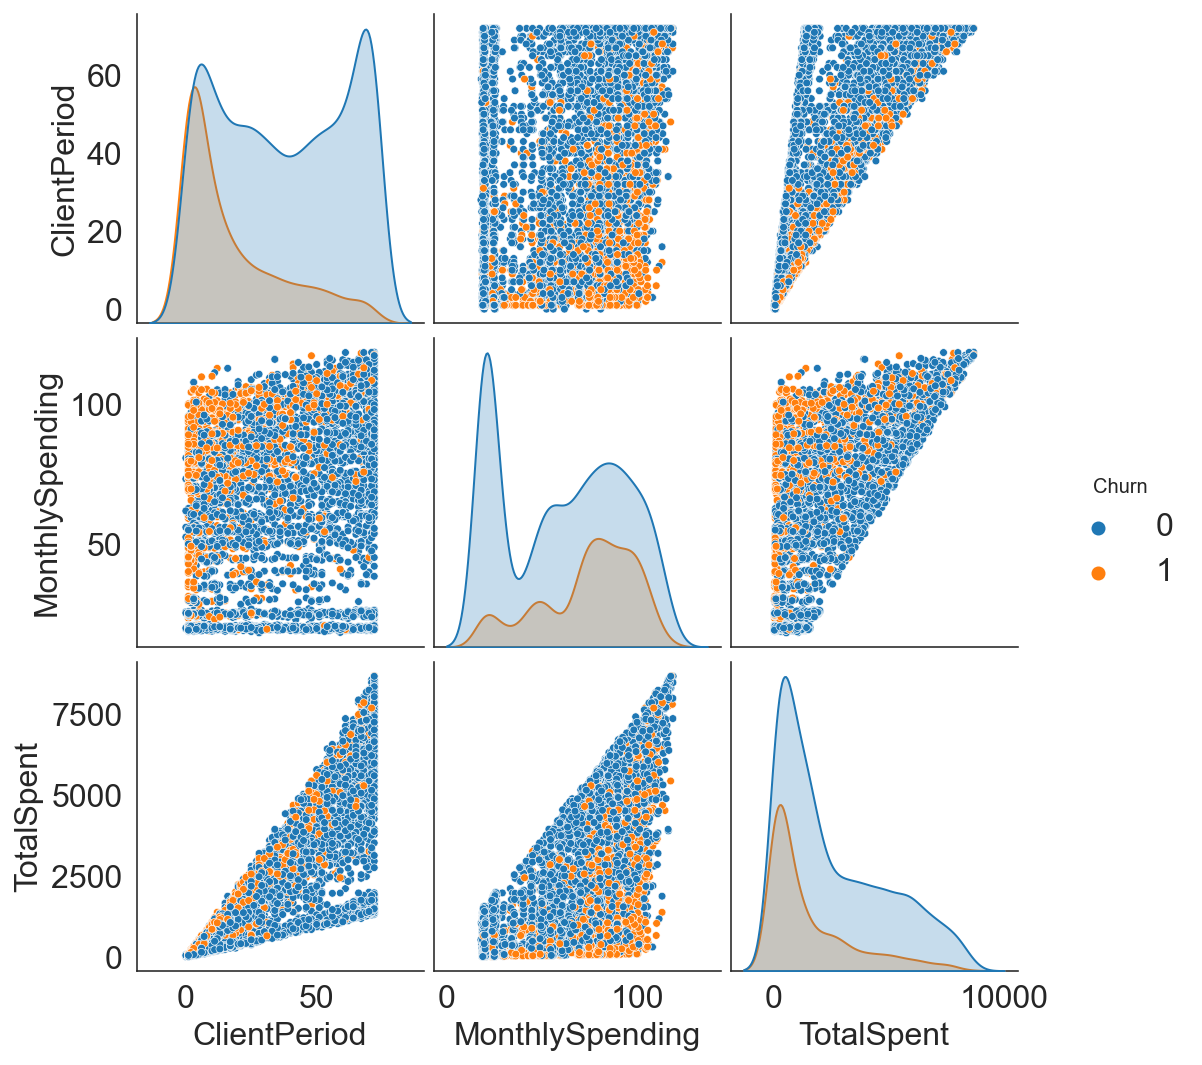

In [33]:
sns.pairplot(data=data, vars=num_cols, hue=target_col, plot_kws={'s': 15});

Простое разделение классов не просматривается. Целесообразно попробовать создание новых признаков на основе имеющихся.

#### Pandas Visual Analysis

Попробуем библиотеку [Pandas Visual Analysis](https://pypi.org/project/pandas-visual-analysis/), которая позволяет провести первичный анализ данных с помощью средств интерактивной визуализации прямо в блокноте:

In [34]:
VisualAnalysis(data, categorical_columns=cat_cols)

## Применение линейных моделей (3 балла)

1) [Обработайте](#Предобработка-данных) данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и [выберите](#Подбор-параметра-логистической-регрессии) лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

### Предобработка данных

Опишем класс-трансформер для предобработки признаков следующим образом:
- удаление пропусков в 'TotalSpent';
- преобразование признака 'TotalSpent' к числовому виду;
- создание нового признака, показывающего насколько траты в месяц одного клиента отличаются от среднего значения данного показателя по всей обучающей выборке;
- вычисление второй и третьей степени нового признака.

In [35]:
class ChurnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.MonthlySpendingMean = 0
    
    def fit(self, X, y = None):
        self.MonthlySpendingMean = X.MonthlySpending.mean()
        return self

    def transform(self, X, y = None):
        assert self.MonthlySpendingMean != 0, f'{type(self).__name__}: transform вызван до fit'

        X_ = X.copy()
            
        if X_['TotalSpent'].dtype == object:
            X_.loc[X_.TotalSpent.str.strip() == '', 'TotalSpent'] = X_.loc[X_.TotalSpent.str.strip() == '', 'MonthlySpending']
            X_.TotalSpent = X_.TotalSpent.astype(float)

        X_['f1'] = (self.MonthlySpendingMean - X_.MonthlySpending) / self.MonthlySpendingMean

        return X_

Опишем конвейер для предобработки данных, кодирования категориальных признаков и масштабирования числовых:

In [36]:
churn_preprocess_pipeline = Pipeline(
    steps=[
        ('churn_transformer',
             ChurnTransformer()),
        ('column_transformer',
            ColumnTransformer(
                remainder='passthrough',
                transformers=[
                    ('category_transformer',
                        OneHotEncoder(drop='first'), cat_cols),
                    ('num_scaler',
                        RobustScaler(), num_cols + ['f1'])
                ]
            )
        )
    ]
)

Выделим из обучающей выборки признаки и целевую переменную:

In [37]:
X = data.drop(columns=['Churn'])
y = data['Churn']

### Подбор параметра логистической регрессии

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Опишем конвейер логистической регрессии:

In [38]:
logistic_regression_pipeline = Pipeline(
    steps=[
        ('preprocessing',
             churn_preprocess_pipeline),
        ('logistic_regression',
             LogisticRegression(max_iter=10000, random_state=123))
    ]
)

Зададим сетку параметров для поиска оптимальной модели по кросс-валидации:

In [39]:
logistic_regression_grid_params = {
    'logistic_regression__C': [100, 75, 50, 25, 10, 1, 0.1, 0.01, 0.001],
    'logistic_regression__class_weight': ['none', 'balanced'],
    'logistic_regression__solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logistic_regression__penalty': ['l1', 'l2', 'elasticnet']
}

In [40]:
logistic_regression_grid = GridSearchCV(logistic_regression_pipeline,
                                        logistic_regression_grid_params,
                                        cv=10, n_jobs=-1, scoring='roc_auc', verbose=1)
logistic_regression_grid.fit(X, y);

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  2.5min finished


In [41]:
display(HTML(f'<b>Наилучший результат ROC-AUC = {logistic_regression_grid.best_score_} '
             'показан моделью логистической регрессии с параметрами:</b>'))
for param, value in logistic_regression_grid.best_params_.items():
    display(HTML(f'{param.replace("logistic_regression__", "")} = {value}'))

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметра количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Предобработаем обучающую выборку:

In [42]:
transformer = ChurnTransformer()
X_train = transformer.fit_transform(X)

Создадим модель CatBoost:

In [43]:
model = CatBoostClassifier(cat_features=cat_cols, loss_function='CrossEntropy',
                           eval_metric='AUC:hints=skip_train~false', thread_count=-1,
                           random_seed=42)

Зададим сетку параметров для поиска оптимальной модели по кросс-валидации:

In [44]:
grid = {
        'learning_rate':  [0.03, 0.05, 0.1, 0.15],
        'depth':          [None, 4, 5, 6, 7, 8, 9],
        'l2_leaf_reg':    [None, 1, 3, 5, 6, 7, 8, 9],
        'n_estimators':   [None, 50, 60, 70, 80, 90, 100],
        'bootstrap_type': [None, 'Poisson', 'Bayesian', 'Bernoulli']
}

Определим лучшие параметры по кросс-валидации:

In [45]:
grid_search_result = model.grid_search(grid,
                                       X=X_train,
                                       y=y,
                                       cv=10,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8623609997
bestIteration = 49

0:	loss: 0.8623610	best: 0.8623610 (0)	total: 1.76s	remaining: 3h 4m 9s

bestTest = 0.8702161909
bestIteration = 49

1:	loss: 0.8702162	best: 0.8702162 (1)	total: 3.39s	remaining: 2h 57m 14s

bestTest = 0.8701684245
bestIteration = 48

2:	loss: 0.8701684	best: 0.8702162 (1)	total: 4.7s	remaining: 2h 43m 43s

bestTest = 0.8687545378
bestIteration = 48

3:	loss: 0.8687545	best: 0.8702162 (1)	total: 6.29s	remaining: 2h 44m 22s

bestTest = 0.8710162788
bestIteration = 49

4:	loss: 0.8710163	best: 0.8710163 (4)	total: 7.74s	remaining: 2h 41m 39s

bestTest = 0.8711404716
bestIteration = 32

5:	loss: 0.8711405	best: 0.8711405 (5)	total: 9.46s	remaining: 2h 44m 43s

bestTest = 0.8706938553
bestIteration = 44

6:	loss: 0.8706939	best: 0.8711405 (5)	total: 11s	remaining: 2h 44m 16s

bestTest = 0.8720790821
bestIteration = 32

7:	loss: 0.8720791	best: 0.8720791 (7)	total: 12.5s	remaining: 2h 42m 39s

bestTest = 0.8657070389
bestIteration = 49

8:	loss:


bestTest = 0.8723322443
bestIteration = 53

69:	loss: 0.8723322	best: 0.8726451 (31)	total: 1m 51s	remaining: 2h 44m 7s

bestTest = 0.8688882838
bestIteration = 27

70:	loss: 0.8688883	best: 0.8726451 (31)	total: 1m 52s	remaining: 2h 44m 12s

bestTest = 0.8726904926
bestIteration = 54

71:	loss: 0.8726905	best: 0.8726905 (71)	total: 1m 54s	remaining: 2h 44m 31s

bestTest = 0.8691916007
bestIteration = 59

72:	loss: 0.8691916	best: 0.8726905 (71)	total: 1m 56s	remaining: 2h 44m 44s

bestTest = 0.8711667431
bestIteration = 59

73:	loss: 0.8711667	best: 0.8726905 (71)	total: 1m 58s	remaining: 2h 45m 15s

bestTest = 0.8714270702
bestIteration = 57

74:	loss: 0.8714271	best: 0.8726905 (71)	total: 2m	remaining: 2h 45m 24s

bestTest = 0.8692178723
bestIteration = 59

75:	loss: 0.8692179	best: 0.8726905 (71)	total: 2m 2s	remaining: 2h 45m 48s

bestTest = 0.8689909817
bestIteration = 50

76:	loss: 0.8689910	best: 0.8726905 (71)	total: 2m 4s	remaining: 2h 46m 21s

bestTest = 0.8717423287
bestIt


bestTest = 0.8688715656
bestIteration = 69

137:	loss: 0.8688716	best: 0.8726905 (71)	total: 4m 4s	remaining: 3h 1m 5s

bestTest = 0.8705123428
bestIteration = 59

138:	loss: 0.8705123	best: 0.8726905 (71)	total: 4m 6s	remaining: 3h 1m 23s

bestTest = 0.8708084948
bestIteration = 69

139:	loss: 0.8708085	best: 0.8726905 (71)	total: 4m 8s	remaining: 3h 1m 35s

bestTest = 0.8712670526
bestIteration = 51

140:	loss: 0.8712671	best: 0.8726905 (71)	total: 4m 10s	remaining: 3h 1m 43s

bestTest = 0.8712646643
bestIteration = 36

141:	loss: 0.8712647	best: 0.8726905 (71)	total: 4m 13s	remaining: 3h 2m 6s

bestTest = 0.8709828423
bestIteration = 48

142:	loss: 0.8709828	best: 0.8726905 (71)	total: 4m 15s	remaining: 3h 2m 26s

bestTest = 0.872664221
bestIteration = 58

143:	loss: 0.8726642	best: 0.8726905 (71)	total: 4m 17s	remaining: 3h 2m 28s

bestTest = 0.8680523711
bestIteration = 62

144:	loss: 0.8680524	best: 0.8726905 (71)	total: 4m 19s	remaining: 3h 2m 41s

bestTest = 0.8703236654
bestI


bestTest = 0.8719238412
bestIteration = 46

205:	loss: 0.8719238	best: 0.8726905 (71)	total: 6m 42s	remaining: 3h 17m 24s

bestTest = 0.8714939432
bestIteration = 59

206:	loss: 0.8714939	best: 0.8726905 (71)	total: 6m 44s	remaining: 3h 17m 40s

bestTest = 0.8697074783
bestIteration = 45

207:	loss: 0.8697075	best: 0.8726905 (71)	total: 6m 47s	remaining: 3h 17m 54s

bestTest = 0.8719525011
bestIteration = 77

208:	loss: 0.8719525	best: 0.8726905 (71)	total: 6m 49s	remaining: 3h 18m 10s

bestTest = 0.8689862051
bestIteration = 79

209:	loss: 0.8689862	best: 0.8726905 (71)	total: 6m 52s	remaining: 3h 18m 19s

bestTest = 0.8718736864
bestIteration = 76

210:	loss: 0.8718737	best: 0.8726905 (71)	total: 6m 54s	remaining: 3h 18m 31s

bestTest = 0.8719692193
bestIteration = 53

211:	loss: 0.8719692	best: 0.8726905 (71)	total: 6m 57s	remaining: 3h 18m 50s

bestTest = 0.8699773587
bestIteration = 60

212:	loss: 0.8699774	best: 0.8726905 (71)	total: 7m	remaining: 3h 19m 7s

bestTest = 0.8711428


bestTest = 0.8705959341
bestIteration = 89

273:	loss: 0.8705959	best: 0.8726905 (71)	total: 9m 49s	remaining: 3h 35m

bestTest = 0.8727119875
bestIteration = 86

274:	loss: 0.8727120	best: 0.8727120 (274)	total: 9m 51s	remaining: 3h 35m 5s

bestTest = 0.8717733769
bestIteration = 87

275:	loss: 0.8717734	best: 0.8727120 (274)	total: 9m 54s	remaining: 3h 35m 20s

bestTest = 0.8686279567
bestIteration = 47

276:	loss: 0.8686280	best: 0.8727120 (274)	total: 9m 57s	remaining: 3h 35m 29s

bestTest = 0.8726092896
bestIteration = 48

277:	loss: 0.8726093	best: 0.8727120 (274)	total: 10m	remaining: 3h 35m 44s

bestTest = 0.8692035424
bestIteration = 33

278:	loss: 0.8692035	best: 0.8727120 (274)	total: 10m 3s	remaining: 3h 35m 56s

bestTest = 0.8694256563
bestIteration = 48

279:	loss: 0.8694257	best: 0.8727120 (274)	total: 10m 6s	remaining: 3h 36m 11s

bestTest = 0.8692775803
bestIteration = 98

280:	loss: 0.8692776	best: 0.8727120 (274)	total: 10m 9s	remaining: 3h 36m 25s

bestTest = 0.872


bestTest = 0.8687402079
bestIteration = 30

340:	loss: 0.8687402	best: 0.8728171 (297)	total: 13m 7s	remaining: 3h 48m 22s

bestTest = 0.8708777561
bestIteration = 45

341:	loss: 0.8708778	best: 0.8728171 (297)	total: 13m 9s	remaining: 3h 48m 1s

bestTest = 0.8709326875
bestIteration = 20

342:	loss: 0.8709327	best: 0.8728171 (297)	total: 13m 10s	remaining: 3h 47m 42s

bestTest = 0.8684894341
bestIteration = 32

343:	loss: 0.8684894	best: 0.8728171 (297)	total: 13m 11s	remaining: 3h 47m 27s

bestTest = 0.8640782032
bestIteration = 49

344:	loss: 0.8640782	best: 0.8728171 (297)	total: 13m 13s	remaining: 3h 47m 10s

bestTest = 0.8686924414
bestIteration = 48

345:	loss: 0.8686924	best: 0.8728171 (297)	total: 13m 14s	remaining: 3h 46m 53s

bestTest = 0.8707225152
bestIteration = 49

346:	loss: 0.8707225	best: 0.8728171 (297)	total: 13m 16s	remaining: 3h 46m 33s

bestTest = 0.871107035
bestIteration = 47

347:	loss: 0.8711070	best: 0.8728171 (297)	total: 13m 17s	remaining: 3h 46m 17s

bes


bestTest = 0.8680404295
bestIteration = 36

406:	loss: 0.8680404	best: 0.8728171 (297)	total: 14m 46s	remaining: 3h 32m 51s

bestTest = 0.8715417097
bestIteration = 22

407:	loss: 0.8715417	best: 0.8728171 (297)	total: 14m 47s	remaining: 3h 32m 42s

bestTest = 0.8663805457
bestIteration = 59

408:	loss: 0.8663805	best: 0.8728171 (297)	total: 14m 49s	remaining: 3h 32m 32s

bestTest = 0.8707201269
bestIteration = 59

409:	loss: 0.8707201	best: 0.8728171 (297)	total: 14m 51s	remaining: 3h 32m 26s

bestTest = 0.8700633383
bestIteration = 54

410:	loss: 0.8700633	best: 0.8728171 (297)	total: 14m 52s	remaining: 3h 32m 13s

bestTest = 0.8708419313
bestIteration = 59

411:	loss: 0.8708419	best: 0.8728171 (297)	total: 14m 54s	remaining: 3h 32m 6s

bestTest = 0.8695952272
bestIteration = 27

412:	loss: 0.8695952	best: 0.8728171 (297)	total: 14m 56s	remaining: 3h 31m 55s

bestTest = 0.870825213
bestIteration = 39

413:	loss: 0.8708252	best: 0.8728171 (297)	total: 14m 57s	remaining: 3h 31m 44s

b


bestTest = 0.8694781994
bestIteration = 68

472:	loss: 0.8694782	best: 0.8728481 (445)	total: 16m 44s	remaining: 3h 25m 9s

bestTest = 0.8707057969
bestIteration = 69

473:	loss: 0.8707058	best: 0.8728481 (445)	total: 16m 46s	remaining: 3h 25m 8s

bestTest = 0.8709231342
bestIteration = 67

474:	loss: 0.8709231	best: 0.8728481 (445)	total: 16m 48s	remaining: 3h 25m 5s

bestTest = 0.872738259
bestIteration = 56

475:	loss: 0.8727383	best: 0.8728481 (445)	total: 16m 50s	remaining: 3h 25m 1s

bestTest = 0.8700418434
bestIteration = 45

476:	loss: 0.8700418	best: 0.8728481 (445)	total: 16m 52s	remaining: 3h 24m 57s

bestTest = 0.8712718293
bestIteration = 63

477:	loss: 0.8712718	best: 0.8728481 (445)	total: 16m 54s	remaining: 3h 24m 56s

bestTest = 0.865033532
bestIteration = 30

478:	loss: 0.8650335	best: 0.8728481 (445)	total: 16m 56s	remaining: 3h 24m 52s

bestTest = 0.8718641331
bestIteration = 22

479:	loss: 0.8718641	best: 0.8728481 (445)	total: 16m 58s	remaining: 3h 24m 50s

bestT


bestTest = 0.8712168979
bestIteration = 50

538:	loss: 0.8712169	best: 0.8728481 (445)	total: 19m 3s	remaining: 3h 22m 41s

bestTest = 0.8726260079
bestIteration = 68

539:	loss: 0.8726260	best: 0.8728481 (445)	total: 19m 5s	remaining: 3h 22m 41s

bestTest = 0.8692107073
bestIteration = 39

540:	loss: 0.8692107	best: 0.8728481 (445)	total: 19m 7s	remaining: 3h 22m 37s

bestTest = 0.8726522794
bestIteration = 36

541:	loss: 0.8726523	best: 0.8728481 (445)	total: 19m 9s	remaining: 3h 22m 36s

bestTest = 0.8648950094
bestIteration = 37

542:	loss: 0.8648950	best: 0.8728481 (445)	total: 19m 12s	remaining: 3h 22m 38s

bestTest = 0.872241488
bestIteration = 43

543:	loss: 0.8722415	best: 0.8728481 (445)	total: 19m 14s	remaining: 3h 22m 37s

bestTest = 0.8707010203
bestIteration = 79

544:	loss: 0.8707010	best: 0.8728481 (445)	total: 19m 16s	remaining: 3h 22m 37s

bestTest = 0.8695880622
bestIteration = 77

545:	loss: 0.8695881	best: 0.8728481 (445)	total: 19m 19s	remaining: 3h 22m 40s

best


bestTest = 0.8701851427
bestIteration = 45

604:	loss: 0.8701851	best: 0.8728481 (445)	total: 21m 44s	remaining: 3h 23m 36s

bestTest = 0.8690339715
bestIteration = 44

605:	loss: 0.8690340	best: 0.8728481 (445)	total: 21m 46s	remaining: 3h 23m 37s

bestTest = 0.87252331
bestIteration = 61

606:	loss: 0.8725233	best: 0.8728481 (445)	total: 21m 49s	remaining: 3h 23m 38s

bestTest = 0.871529768
bestIteration = 21

607:	loss: 0.8715298	best: 0.8728481 (445)	total: 21m 51s	remaining: 3h 23m 40s

bestTest = 0.8712455577
bestIteration = 86

608:	loss: 0.8712456	best: 0.8728481 (445)	total: 21m 54s	remaining: 3h 23m 42s

bestTest = 0.8708658145
bestIteration = 86

609:	loss: 0.8708658	best: 0.8728481 (445)	total: 21m 57s	remaining: 3h 23m 45s

bestTest = 0.8708705912
bestIteration = 88

610:	loss: 0.8708706	best: 0.8728481 (445)	total: 21m 59s	remaining: 3h 23m 47s

bestTest = 0.8716467958
bestIteration = 89

611:	loss: 0.8716468	best: 0.8728481 (445)	total: 22m 2s	remaining: 3h 23m 49s

bes


bestTest = 0.8655040315
bestIteration = 27

670:	loss: 0.8655040	best: 0.8731849 (619)	total: 24m 45s	remaining: 3h 26m 38s

bestTest = 0.8727669189
bestIteration = 23

671:	loss: 0.8727669	best: 0.8731849 (619)	total: 24m 48s	remaining: 3h 26m 42s

bestTest = 0.8644579464
bestIteration = 49

672:	loss: 0.8644579	best: 0.8731849 (619)	total: 24m 49s	remaining: 3h 26m 34s

bestTest = 0.8697910696
bestIteration = 49

673:	loss: 0.8697911	best: 0.8731849 (619)	total: 24m 51s	remaining: 3h 26m 26s

bestTest = 0.8671065956
bestIteration = 47

674:	loss: 0.8671066	best: 0.8731849 (619)	total: 24m 52s	remaining: 3h 26m 18s

bestTest = 0.8696095571
bestIteration = 47

675:	loss: 0.8696096	best: 0.8731849 (619)	total: 24m 54s	remaining: 3h 26m 11s

bestTest = 0.8688476824
bestIteration = 36

676:	loss: 0.8688477	best: 0.8731849 (619)	total: 24m 56s	remaining: 3h 26m 4s

bestTest = 0.8658742214
bestIteration = 33

677:	loss: 0.8658742	best: 0.8731849 (619)	total: 24m 57s	remaining: 3h 25m 56s




bestTest = 0.8702663457
bestIteration = 59

736:	loss: 0.8702663	best: 0.8731849 (619)	total: 26m 36s	remaining: 3h 19m 51s

bestTest = 0.8695976155
bestIteration = 59

737:	loss: 0.8695976	best: 0.8731849 (619)	total: 26m 38s	remaining: 3h 19m 47s

bestTest = 0.8697265849
bestIteration = 59

738:	loss: 0.8697266	best: 0.8731849 (619)	total: 26m 40s	remaining: 3h 19m 44s

bestTest = 0.8709446291
bestIteration = 55

739:	loss: 0.8709446	best: 0.8731849 (619)	total: 26m 42s	remaining: 3h 19m 40s

bestTest = 0.8685539188
bestIteration = 37

740:	loss: 0.8685539	best: 0.8731849 (619)	total: 26m 44s	remaining: 3h 19m 36s

bestTest = 0.8688476824
bestIteration = 48

741:	loss: 0.8688477	best: 0.8731849 (619)	total: 26m 46s	remaining: 3h 19m 31s

bestTest = 0.8685228706
bestIteration = 32

742:	loss: 0.8685229	best: 0.8731849 (619)	total: 26m 48s	remaining: 3h 19m 27s

bestTest = 0.8688882838
bestIteration = 27

743:	loss: 0.8688883	best: 0.8731849 (619)	total: 26m 50s	remaining: 3h 19m 24s



bestTest = 0.8688882838
bestIteration = 56

802:	loss: 0.8688883	best: 0.8731849 (619)	total: 28m 52s	remaining: 3h 16m 42s

bestTest = 0.8695355191
bestIteration = 39

803:	loss: 0.8695355	best: 0.8731849 (619)	total: 28m 55s	remaining: 3h 16m 40s

bestTest = 0.8663327792
bestIteration = 42

804:	loss: 0.8663328	best: 0.8731849 (619)	total: 28m 57s	remaining: 3h 16m 39s

bestTest = 0.8703523253
bestIteration = 67

805:	loss: 0.8703523	best: 0.8731849 (619)	total: 28m 59s	remaining: 3h 16m 37s

bestTest = 0.8642215025
bestIteration = 49

806:	loss: 0.8642215	best: 0.8731849 (619)	total: 29m 1s	remaining: 3h 16m 35s

bestTest = 0.8676750162
bestIteration = 13

807:	loss: 0.8676750	best: 0.8731849 (619)	total: 29m 4s	remaining: 3h 16m 35s

bestTest = 0.8651983263
bestIteration = 69

808:	loss: 0.8651983	best: 0.8731849 (619)	total: 29m 6s	remaining: 3h 16m 34s

bestTest = 0.8684918224
bestIteration = 69

809:	loss: 0.8684918	best: 0.8731849 (619)	total: 29m 8s	remaining: 3h 16m 32s

bes


bestTest = 0.8654204402
bestIteration = 42

868:	loss: 0.8654204	best: 0.8731849 (619)	total: 31m 29s	remaining: 3h 15m 50s

bestTest = 0.8685085406
bestIteration = 35

869:	loss: 0.8685085	best: 0.8731849 (619)	total: 31m 32s	remaining: 3h 15m 50s

bestTest = 0.8669632963
bestIteration = 38

870:	loss: 0.8669633	best: 0.8731849 (619)	total: 31m 35s	remaining: 3h 15m 50s

bestTest = 0.8674887271
bestIteration = 13

871:	loss: 0.8674887	best: 0.8731849 (619)	total: 31m 37s	remaining: 3h 15m 51s

bestTest = 0.8663112843
bestIteration = 79

872:	loss: 0.8663113	best: 0.8731849 (619)	total: 31m 40s	remaining: 3h 15m 51s

bestTest = 0.8696740418
bestIteration = 74

873:	loss: 0.8696740	best: 0.8731849 (619)	total: 31m 42s	remaining: 3h 15m 52s

bestTest = 0.8695665673
bestIteration = 79

874:	loss: 0.8695666	best: 0.8731849 (619)	total: 31m 45s	remaining: 3h 15m 51s

bestTest = 0.8695785089
bestIteration = 76

875:	loss: 0.8695785	best: 0.8731849 (619)	total: 31m 47s	remaining: 3h 15m 51s



bestTest = 0.8654753716
bestIteration = 29

934:	loss: 0.8654754	best: 0.8731849 (619)	total: 34m 32s	remaining: 3h 17m 11s

bestTest = 0.8701851427
bestIteration = 11

935:	loss: 0.8701851	best: 0.8731849 (619)	total: 34m 35s	remaining: 3h 17m 13s

bestTest = 0.866798502
bestIteration = 89

936:	loss: 0.8667985	best: 0.8731849 (619)	total: 34m 38s	remaining: 3h 17m 16s

bestTest = 0.8689957583
bestIteration = 85

937:	loss: 0.8689958	best: 0.8731849 (619)	total: 34m 41s	remaining: 3h 17m 18s

bestTest = 0.8691844358
bestIteration = 89

938:	loss: 0.8691844	best: 0.8731849 (619)	total: 34m 44s	remaining: 3h 17m 19s

bestTest = 0.8683246398
bestIteration = 80

939:	loss: 0.8683246	best: 0.8731849 (619)	total: 34m 47s	remaining: 3h 17m 22s

bestTest = 0.8657834652
bestIteration = 52

940:	loss: 0.8657835	best: 0.8731849 (619)	total: 34m 50s	remaining: 3h 17m 23s

bestTest = 0.8692130956
bestIteration = 26

941:	loss: 0.8692131	best: 0.8731849 (619)	total: 34m 53s	remaining: 3h 17m 25s




bestTest = 0.8675221636
bestIteration = 95

1000:	loss: 0.8675222	best: 0.8731849 (619)	total: 38m 1s	remaining: 3h 20m 13s

bestTest = 0.8709374642
bestIteration = 99

1001:	loss: 0.8709375	best: 0.8731849 (619)	total: 38m 4s	remaining: 3h 20m 17s

bestTest = 0.8700251251
bestIteration = 98

1002:	loss: 0.8700251	best: 0.8731849 (619)	total: 38m 8s	remaining: 3h 20m 21s

bestTest = 0.8695880622
bestIteration = 83

1003:	loss: 0.8695881	best: 0.8731849 (619)	total: 38m 11s	remaining: 3h 20m 23s

bestTest = 0.8661441018
bestIteration = 63

1004:	loss: 0.8661441	best: 0.8731849 (619)	total: 38m 14s	remaining: 3h 20m 25s

bestTest = 0.8692536971
bestIteration = 44

1005:	loss: 0.8692537	best: 0.8731849 (619)	total: 38m 17s	remaining: 3h 20m 26s

bestTest = 0.8677466659
bestIteration = 34

1006:	loss: 0.8677467	best: 0.8731849 (619)	total: 38m 20s	remaining: 3h 20m 29s

bestTest = 0.8699319806
bestIteration = 40

1007:	loss: 0.8699320	best: 0.8731849 (619)	total: 38m 23s	remaining: 3h 20m


bestTest = 0.8687736444
bestIteration = 58

1066:	loss: 0.8687736	best: 0.8731849 (619)	total: 40m 13s	remaining: 3h 16m 11s

bestTest = 0.8664450304
bestIteration = 43

1067:	loss: 0.8664450	best: 0.8731849 (619)	total: 40m 15s	remaining: 3h 16m 9s

bestTest = 0.8661632084
bestIteration = 59

1068:	loss: 0.8661632	best: 0.8731849 (619)	total: 40m 17s	remaining: 3h 16m 6s

bestTest = 0.8662897894
bestIteration = 22

1069:	loss: 0.8662898	best: 0.8731849 (619)	total: 40m 19s	remaining: 3h 16m 4s

bestTest = 0.8625186289
bestIteration = 14

1070:	loss: 0.8625186	best: 0.8731849 (619)	total: 40m 21s	remaining: 3h 16m

bestTest = 0.8686972181
bestIteration = 35

1071:	loss: 0.8686972	best: 0.8731849 (619)	total: 40m 23s	remaining: 3h 15m 56s

bestTest = 0.8690650197
bestIteration = 59

1072:	loss: 0.8690650	best: 0.8731849 (619)	total: 40m 25s	remaining: 3h 15m 54s

bestTest = 0.869764798
bestIteration = 59

1073:	loss: 0.8697648	best: 0.8731849 (619)	total: 40m 28s	remaining: 3h 15m 54s



bestTest = 0.8662993427
bestIteration = 27

1132:	loss: 0.8662993	best: 0.8731849 (619)	total: 42m 40s	remaining: 3h 13m 32s

bestTest = 0.8660318507
bestIteration = 25

1133:	loss: 0.8660319	best: 0.8731849 (619)	total: 42m 42s	remaining: 3h 13m 30s

bestTest = 0.86476604
bestIteration = 21

1134:	loss: 0.8647660	best: 0.8731849 (619)	total: 42m 45s	remaining: 3h 13m 30s

bestTest = 0.8690387481
bestIteration = 31

1135:	loss: 0.8690387	best: 0.8731849 (619)	total: 42m 47s	remaining: 3h 13m 29s

bestTest = 0.869074573
bestIteration = 57

1136:	loss: 0.8690746	best: 0.8731849 (619)	total: 42m 50s	remaining: 3h 13m 28s

bestTest = 0.8707177385
bestIteration = 65

1137:	loss: 0.8707177	best: 0.8731849 (619)	total: 42m 53s	remaining: 3h 13m 28s

bestTest = 0.8677108411
bestIteration = 37

1138:	loss: 0.8677108	best: 0.8731849 (619)	total: 42m 55s	remaining: 3h 13m 26s

bestTest = 0.8698722725
bestIteration = 59

1139:	loss: 0.8698723	best: 0.8731849 (619)	total: 42m 57s	remaining: 3h 13m


bestTest = 0.862363388
bestIteration = 15

1198:	loss: 0.8623634	best: 0.8731849 (619)	total: 45m 36s	remaining: 3h 12m 57s

bestTest = 0.8685610837
bestIteration = 27

1199:	loss: 0.8685611	best: 0.8731849 (619)	total: 45m 39s	remaining: 3h 12m 57s

bestTest = 0.8690626314
bestIteration = 75

1200:	loss: 0.8690626	best: 0.8731849 (619)	total: 45m 41s	remaining: 3h 12m 57s

bestTest = 0.8686757232
bestIteration = 60

1201:	loss: 0.8686757	best: 0.8731849 (619)	total: 45m 44s	remaining: 3h 12m 58s

bestTest = 0.868355688
bestIteration = 54

1202:	loss: 0.8683557	best: 0.8731849 (619)	total: 45m 47s	remaining: 3h 12m 58s

bestTest = 0.8693086285
bestIteration = 38

1203:	loss: 0.8693086	best: 0.8731849 (619)	total: 45m 51s	remaining: 3h 13m 1s

bestTest = 0.8637080133
bestIteration = 33

1204:	loss: 0.8637080	best: 0.8731849 (619)	total: 45m 54s	remaining: 3h 13m 2s

bestTest = 0.8679616149
bestIteration = 45

1205:	loss: 0.8679616	best: 0.8731849 (619)	total: 45m 56s	remaining: 3h 13m 


bestTest = 0.8690506897
bestIteration = 72

1264:	loss: 0.8690507	best: 0.8731849 (619)	total: 48m 57s	remaining: 3h 13m 48s

bestTest = 0.8699845237
bestIteration = 83

1265:	loss: 0.8699845	best: 0.8731849 (619)	total: 49m 1s	remaining: 3h 13m 50s

bestTest = 0.8682792617
bestIteration = 49

1266:	loss: 0.8682793	best: 0.8731849 (619)	total: 49m 4s	remaining: 3h 13m 52s

bestTest = 0.8702066376
bestIteration = 42

1267:	loss: 0.8702066	best: 0.8731849 (619)	total: 49m 8s	remaining: 3h 13m 56s

bestTest = 0.8674958921
bestIteration = 29

1268:	loss: 0.8674959	best: 0.8731849 (619)	total: 49m 11s	remaining: 3h 13m 57s

bestTest = 0.8674672322
bestIteration = 24

1269:	loss: 0.8674672	best: 0.8731849 (619)	total: 49m 14s	remaining: 3h 13m 58s

bestTest = 0.8666623677
bestIteration = 27

1270:	loss: 0.8666624	best: 0.8731849 (619)	total: 49m 18s	remaining: 3h 14m 1s

bestTest = 0.8663280026
bestIteration = 17

1271:	loss: 0.8663280	best: 0.8731849 (619)	total: 49m 22s	remaining: 3h 14m 


bestTest = 0.8683318048
bestIteration = 50

1330:	loss: 0.8683318	best: 0.8731849 (619)	total: 52m 49s	remaining: 3h 16m 6s

bestTest = 0.870194696
bestIteration = 41

1331:	loss: 0.8701947	best: 0.8731849 (619)	total: 52m 53s	remaining: 3h 16m 9s

bestTest = 0.8650311437
bestIteration = 32

1332:	loss: 0.8650311	best: 0.8731849 (619)	total: 52m 57s	remaining: 3h 16m 11s

bestTest = 0.8708586495
bestIteration = 26

1333:	loss: 0.8708586	best: 0.8731849 (619)	total: 53m	remaining: 3h 16m 14s

bestTest = 0.8639587871
bestIteration = 25

1334:	loss: 0.8639588	best: 0.8731849 (619)	total: 53m 4s	remaining: 3h 16m 15s

bestTest = 0.8673048263
bestIteration = 25

1335:	loss: 0.8673048	best: 0.8731849 (619)	total: 53m 7s	remaining: 3h 16m 17s

bestTest = 0.8696573236
bestIteration = 84

1336:	loss: 0.8696573	best: 0.8731849 (619)	total: 53m 11s	remaining: 3h 16m 18s

bestTest = 0.8709947839
bestIteration = 94

1337:	loss: 0.8709948	best: 0.8731849 (619)	total: 53m 15s	remaining: 3h 16m 23s




bestTest = 0.8622033704
bestIteration = 32

1396:	loss: 0.8622034	best: 0.8731849 (619)	total: 55m 16s	remaining: 3h 12m 52s

bestTest = 0.8660222974
bestIteration = 28

1397:	loss: 0.8660223	best: 0.8731849 (619)	total: 55m 18s	remaining: 3h 12m 49s

bestTest = 0.8610330926
bestIteration = 19

1398:	loss: 0.8610331	best: 0.8731849 (619)	total: 55m 20s	remaining: 3h 12m 44s

bestTest = 0.8681526807
bestIteration = 10

1399:	loss: 0.8681527	best: 0.8731849 (619)	total: 55m 22s	remaining: 3h 12m 41s

bestTest = 0.8625425121
bestIteration = 59

1400:	loss: 0.8625425	best: 0.8731849 (619)	total: 55m 24s	remaining: 3h 12m 38s

bestTest = 0.8655231381
bestIteration = 59

1401:	loss: 0.8655231	best: 0.8731849 (619)	total: 55m 26s	remaining: 3h 12m 35s

bestTest = 0.8642238909
bestIteration = 56

1402:	loss: 0.8642239	best: 0.8731849 (619)	total: 55m 29s	remaining: 3h 12m 33s

bestTest = 0.8674170775
bestIteration = 45

1403:	loss: 0.8674171	best: 0.8731849 (619)	total: 55m 31s	remaining: 3h 


bestTest = 0.8580261951
bestIteration = 14

1462:	loss: 0.8580262	best: 0.8731849 (619)	total: 57m 46s	remaining: 3h 9m 53s

bestTest = 0.8666122129
bestIteration = 15

1463:	loss: 0.8666122	best: 0.8731849 (619)	total: 57m 49s	remaining: 3h 9m 52s

bestTest = 0.8637438381
bestIteration = 69

1464:	loss: 0.8637438	best: 0.8731849 (619)	total: 57m 51s	remaining: 3h 9m 51s

bestTest = 0.8654347701
bestIteration = 69

1465:	loss: 0.8654348	best: 0.8731849 (619)	total: 57m 54s	remaining: 3h 9m 51s

bestTest = 0.8675675417
bestIteration = 42

1466:	loss: 0.8675675	best: 0.8731849 (619)	total: 57m 58s	remaining: 3h 9m 52s

bestTest = 0.8682720968
bestIteration = 68

1467:	loss: 0.8682721	best: 0.8731849 (619)	total: 58m 1s	remaining: 3h 9m 52s

bestTest = 0.8623203982
bestIteration = 27

1468:	loss: 0.8623204	best: 0.8731849 (619)	total: 58m 3s	remaining: 3h 9m 50s

bestTest = 0.865174443
bestIteration = 19

1469:	loss: 0.8651744	best: 0.8731849 (619)	total: 58m 6s	remaining: 3h 9m 49s

bes


bestTest = 0.8671758569
bestIteration = 79

1529:	loss: 0.8671759	best: 0.8731849 (619)	total: 1h 59s	remaining: 3h 9m 3s

bestTest = 0.8641976193
bestIteration = 50

1530:	loss: 0.8641976	best: 0.8731849 (619)	total: 1h 1m 2s	remaining: 3h 9m 2s

bestTest = 0.8671806336
bestIteration = 77

1531:	loss: 0.8671806	best: 0.8731849 (619)	total: 1h 1m 5s	remaining: 3h 9m 2s

bestTest = 0.8634285796
bestIteration = 25

1532:	loss: 0.8634286	best: 0.8731849 (619)	total: 1h 1m 9s	remaining: 3h 9m 2s

bestTest = 0.8690029233
bestIteration = 28

1533:	loss: 0.8690029	best: 0.8731849 (619)	total: 1h 1m 12s	remaining: 3h 9m 2s

bestTest = 0.8634118614
bestIteration = 13

1534:	loss: 0.8634119	best: 0.8731849 (619)	total: 1h 1m 15s	remaining: 3h 9m 1s

bestTest = 0.8693181818
bestIteration = 15

1535:	loss: 0.8693182	best: 0.8731849 (619)	total: 1h 1m 18s	remaining: 3h 9m 1s

bestTest = 0.8676176965
bestIteration = 60

1536:	loss: 0.8676177	best: 0.8731849 (619)	total: 1h 1m 21s	remaining: 3h 9m 1


bestTest = 0.867369311
bestIteration = 58

1595:	loss: 0.8673693	best: 0.8731849 (619)	total: 1h 4m 33s	remaining: 3h 9m 9s

bestTest = 0.860383469
bestIteration = 50

1596:	loss: 0.8603835	best: 0.8731849 (619)	total: 1h 4m 36s	remaining: 3h 9m 8s

bestTest = 0.8672116818
bestIteration = 22

1597:	loss: 0.8672117	best: 0.8731849 (619)	total: 1h 4m 40s	remaining: 3h 9m 9s

bestTest = 0.8604933318
bestIteration = 19

1598:	loss: 0.8604933	best: 0.8731849 (619)	total: 1h 4m 43s	remaining: 3h 9m 9s

bestTest = 0.8638298177
bestIteration = 18

1599:	loss: 0.8638298	best: 0.8731849 (619)	total: 1h 4m 47s	remaining: 3h 9m 10s

bestTest = 0.8659434827
bestIteration = 86

1600:	loss: 0.8659435	best: 0.8731849 (619)	total: 1h 4m 50s	remaining: 3h 9m 11s

bestTest = 0.8690530781
bestIteration = 80

1601:	loss: 0.8690531	best: 0.8731849 (619)	total: 1h 4m 53s	remaining: 3h 9m 11s

bestTest = 0.863416638
bestIteration = 47

1602:	loss: 0.8634166	best: 0.8731849 (619)	total: 1h 4m 57s	remaining: 3


bestTest = 0.8608205319
bestIteration = 20

1660:	loss: 0.8608205	best: 0.8731849 (619)	total: 1h 8m 29s	remaining: 3h 10m 8s

bestTest = 0.8693086285
bestIteration = 45

1661:	loss: 0.8693086	best: 0.8731849 (619)	total: 1h 8m 32s	remaining: 3h 10m 7s

bestTest = 0.8657595819
bestIteration = 20

1662:	loss: 0.8657596	best: 0.8731849 (619)	total: 1h 8m 36s	remaining: 3h 10m 9s

bestTest = 0.8683031449
bestIteration = 15

1663:	loss: 0.8683031	best: 0.8731849 (619)	total: 1h 8m 40s	remaining: 3h 10m 10s

bestTest = 0.8672021285
bestIteration = 69

1664:	loss: 0.8672021	best: 0.8731849 (619)	total: 1h 8m 44s	remaining: 3h 10m 11s

bestTest = 0.868006993
bestIteration = 87

1665:	loss: 0.8680070	best: 0.8731849 (619)	total: 1h 8m 47s	remaining: 3h 10m 12s

bestTest = 0.8658909397
bestIteration = 53

1666:	loss: 0.8658909	best: 0.8731849 (619)	total: 1h 8m 51s	remaining: 3h 10m 13s

bestTest = 0.8682410486
bestIteration = 64

1667:	loss: 0.8682410	best: 0.8731849 (619)	total: 1h 8m 55s	re


bestTest = 0.8674600673
bestIteration = 22

1725:	loss: 0.8674601	best: 0.8731849 (619)	total: 1h 11m 20s	remaining: 3h 7m 53s

bestTest = 0.8635145592
bestIteration = 14

1726:	loss: 0.8635146	best: 0.8731849 (619)	total: 1h 11m 22s	remaining: 3h 7m 50s

bestTest = 0.8659100462
bestIteration = 21

1727:	loss: 0.8659100	best: 0.8731849 (619)	total: 1h 11m 24s	remaining: 3h 7m 46s

bestTest = 0.8672379533
bestIteration = 48

1728:	loss: 0.8672380	best: 0.8731849 (619)	total: 1h 11m 26s	remaining: 3h 7m 42s

bestTest = 0.864832913
bestIteration = 42

1729:	loss: 0.8648329	best: 0.8731849 (619)	total: 1h 11m 28s	remaining: 3h 7m 40s

bestTest = 0.8667793955
bestIteration = 45

1730:	loss: 0.8667794	best: 0.8731849 (619)	total: 1h 11m 30s	remaining: 3h 7m 36s

bestTest = 0.8675938133
bestIteration = 34

1731:	loss: 0.8675938	best: 0.8731849 (619)	total: 1h 11m 32s	remaining: 3h 7m 32s

bestTest = 0.8676415797
bestIteration = 20

1732:	loss: 0.8676416	best: 0.8731849 (619)	total: 1h 11m 35


bestTest = 0.8619191601
bestIteration = 15

1790:	loss: 0.8619192	best: 0.8731849 (619)	total: 1h 14m 1s	remaining: 3h 5m 12s

bestTest = 0.8667602889
bestIteration = 12

1791:	loss: 0.8667603	best: 0.8731849 (619)	total: 1h 14m 3s	remaining: 3h 5m 9s

bestTest = 0.8659482594
bestIteration = 69

1792:	loss: 0.8659483	best: 0.8731849 (619)	total: 1h 14m 6s	remaining: 3h 5m 8s

bestTest = 0.8659649776
bestIteration = 60

1793:	loss: 0.8659650	best: 0.8731849 (619)	total: 1h 14m 9s	remaining: 3h 5m 7s

bestTest = 0.8628721006
bestIteration = 42

1794:	loss: 0.8628721	best: 0.8731849 (619)	total: 1h 14m 13s	remaining: 3h 5m 6s

bestTest = 0.8651195116
bestIteration = 36

1795:	loss: 0.8651195	best: 0.8731849 (619)	total: 1h 14m 15s	remaining: 3h 5m 4s

bestTest = 0.8668295502
bestIteration = 19

1796:	loss: 0.8668296	best: 0.8731849 (619)	total: 1h 14m 19s	remaining: 3h 5m 4s

bestTest = 0.8575365891
bestIteration = 30

1797:	loss: 0.8575366	best: 0.8731849 (619)	total: 1h 14m 21s	remaini


bestTest = 0.8646705071
bestIteration = 20

1855:	loss: 0.8646705	best: 0.8731849 (619)	total: 1h 17m 16s	remaining: 3h 3m 52s

bestTest = 0.8665811647
bestIteration = 54

1856:	loss: 0.8665812	best: 0.8731849 (619)	total: 1h 17m 20s	remaining: 3h 3m 52s

bestTest = 0.866242023
bestIteration = 70

1857:	loss: 0.8662420	best: 0.8731849 (619)	total: 1h 17m 23s	remaining: 3h 3m 51s

bestTest = 0.8614940387
bestIteration = 70

1858:	loss: 0.8614940	best: 0.8731849 (619)	total: 1h 17m 26s	remaining: 3h 3m 51s

bestTest = 0.8660199091
bestIteration = 50

1859:	loss: 0.8660199	best: 0.8731849 (619)	total: 1h 17m 30s	remaining: 3h 3m 51s

bestTest = 0.8670038977
bestIteration = 33

1860:	loss: 0.8670039	best: 0.8731849 (619)	total: 1h 17m 33s	remaining: 3h 3m 50s

bestTest = 0.8694877527
bestIteration = 27

1861:	loss: 0.8694878	best: 0.8731849 (619)	total: 1h 17m 36s	remaining: 3h 3m 49s

bestTest = 0.8655613512
bestIteration = 14

1862:	loss: 0.8655614	best: 0.8731849 (619)	total: 1h 17m 40


bestTest = 0.8663065077
bestIteration = 63

1920:	loss: 0.8663065	best: 0.8731849 (619)	total: 1h 21m 3s	remaining: 3h 3m 36s

bestTest = 0.8664402537
bestIteration = 80

1921:	loss: 0.8664403	best: 0.8731849 (619)	total: 1h 21m 7s	remaining: 3h 3m 36s

bestTest = 0.8639540105
bestIteration = 76

1922:	loss: 0.8639540	best: 0.8731849 (619)	total: 1h 21m 11s	remaining: 3h 3m 37s

bestTest = 0.8668510451
bestIteration = 46

1923:	loss: 0.8668510	best: 0.8731849 (619)	total: 1h 21m 15s	remaining: 3h 3m 37s

bestTest = 0.8620958959
bestIteration = 26

1924:	loss: 0.8620959	best: 0.8731849 (619)	total: 1h 21m 19s	remaining: 3h 3m 38s

bestTest = 0.8694853644
bestIteration = 28

1925:	loss: 0.8694854	best: 0.8731849 (619)	total: 1h 21m 22s	remaining: 3h 3m 38s

bestTest = 0.8670540525
bestIteration = 12

1926:	loss: 0.8670541	best: 0.8731849 (619)	total: 1h 21m 26s	remaining: 3h 3m 39s

bestTest = 0.8691032328
bestIteration = 14

1927:	loss: 0.8691032	best: 0.8731849 (619)	total: 1h 21m 30s


bestTest = 0.867799209
bestIteration = 97

1985:	loss: 0.8677992	best: 0.8731849 (619)	total: 1h 25m 21s	remaining: 3h 4m 12s

bestTest = 0.8627574611
bestIteration = 60

1986:	loss: 0.8627575	best: 0.8731849 (619)	total: 1h 25m 25s	remaining: 3h 4m 13s

bestTest = 0.8664307004
bestIteration = 41

1987:	loss: 0.8664307	best: 0.8731849 (619)	total: 1h 25m 29s	remaining: 3h 4m 13s

bestTest = 0.8654204402
bestIteration = 27

1988:	loss: 0.8654204	best: 0.8731849 (619)	total: 1h 25m 34s	remaining: 3h 4m 15s

bestTest = 0.8665190684
bestIteration = 24

1989:	loss: 0.8665191	best: 0.8731849 (619)	total: 1h 25m 38s	remaining: 3h 4m 15s

bestTest = 0.8667961137
bestIteration = 12

1990:	loss: 0.8667961	best: 0.8731849 (619)	total: 1h 25m 42s	remaining: 3h 4m 16s

bestTest = 0.8645128778
bestIteration = 15

1991:	loss: 0.8645129	best: 0.8731849 (619)	total: 1h 25m 46s	remaining: 3h 4m 18s

bestTest = 0.8667937254
bestIteration = 59

1992:	loss: 0.8667937	best: 0.8731849 (619)	total: 1h 25m 50

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [46]:
display(HTML(f'<b>Наилучший результат ROC-AUC = {model.get_best_score()["learn"]["AUC"]} '
             'показан моделью градиентного бустинга с параметрами:</b>'))
for param, value in model.get_params().items():
    display(HTML(f'{param} = {value}'))

# Предсказания

In [47]:
best_model = model

In [48]:
X_test = transformer.transform(pd.read_csv('./test.csv'))

In [49]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

**1) 1 >= roc auc > 0.84 это 5 баллов**

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](https://www.kaggle.com/). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и [**проверить скор**](https://www.kaggle.com/c/advanced-dls-spring-2021/leaderboard) в соревновании.

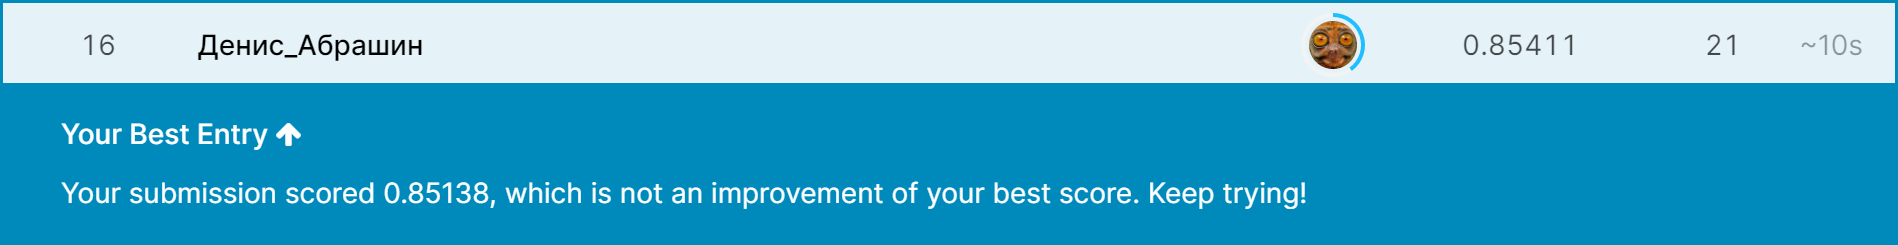

В задании не просили фиксировать `random_seed`, это может повлиять на воспроизводимость результата, но он гарантированно больше 0.84.